In [11]:
from imblearn.metrics import geometric_mean_score
import numpy as np
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn import metrics
np.random.seed(13)
import time
from datetime import datetime, timedelta
from sklearn import svm
import pandas as pd

import matplotlib.pyplot as plt
import math
from __future__ import division
from sklearn.model_selection import KFold
from sklearn.preprocessing import normalize
from stockstats import StockDataFrame 
from googlefinance.client import get_price_data, get_prices_data, get_prices_time_data

files=['AAPL','AMZN','PEP','GOOGL','MSFT','FB','INTC','CSCO','CMCSA','NVDA','NFLX','BKNG','ADBE','AMGN','TXN','AVGO','PYPL','GILD','COST','QCOM']       
     
prices=list()
sentiment=list()
for file in files:
    param = {
        'q': file, # Stock symbol (ex: "AAPL")
        'i': "900", # Interval size in seconds ("86400" = 1 day intervals)
        'x': "NASD", # INDEXNASDAQStock exchange symbol on which stock is traded (ex: "NASD")
        'p': "2Y" # Period (Ex: "1Y" = 1 year)
        }
    sentimentVector =  pd.read_csv('/home/andrea/Desktop/NLFF/intrinioDatasetUpdated/Sentiment/'+file+'.csv')
    price= pd.read_csv('/home/andrea/Desktop/NLFF/TechnicalDatasetUpdated/'+file+'.csv')
    #alignment of data
    maxdata=max(sentimentVector['initTime'])
    mindata=min(sentimentVector['initTime'])
    price['Unnamed: 0'] = [datetime.strptime(row, '%Y-%m-%d %H:%M:%S') for row in price['Unnamed: 0']]
    price['Unnamed: 0'] = [row-timedelta(hours=8) for row in price['Unnamed: 0']]
    price=price[price['Unnamed: 0']>=mindata]
    price=price[price['Unnamed: 0']<=maxdata]
    print(sentimentVector[0:10])
    print(price[0:10])
    sentimentVector=sentimentVector.drop(['Unnamed: 0', 'initTime' ], axis=1)
    meanvector=np.concatenate((sentimentVector,pd.rolling_mean(sentimentVector,2)),axis=1)
    meanvector=np.concatenate((meanvector,pd.rolling_mean(sentimentVector,4)),axis=1)
    meanvector=np.concatenate((meanvector,pd.rolling_mean(sentimentVector,6)),axis=1)
    meanvector=np.concatenate((meanvector,pd.rolling_mean(sentimentVector,8)),axis=1)
    price=price.drop(['Unnamed: 0'],axis=1)
    #['macd','macds', 'boll_ub', 'boll_lb','rsi_6','rsi_12','vr_6_sma','wr_10','wr_6''close_10_sma''tr''middle_{}_sma'
    #df['dma'] = df['close_10_sma'] - df['close_50_sma'] pdi'] = cls._get_pdi(df, 14)df['mdi'] = cls._get_mdi(df, 14)
    #df['dx'] = cls._get_dx(df, 14) df['adx'] = df['dx_6_ema'] df['adxr'] = df['adx_6_ema']]
    #
    sentiment.append(meanvector)
    prices.append(price)

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00         0.000      0.000     0.000   
1           2  2017-08-14 14:00:00         0.000      0.000     0.000   
2           3  2017-08-14 14:15:00         0.000      0.000     1.000   
3           4  2017-08-14 14:30:00         0.000      0.000     1.000   
4           5  2017-08-14 14:45:00         0.250      0.250     1.250   
5           6  2017-08-14 15:00:00         1.125      0.625     1.125   
6           7  2017-08-14 15:15:00         1.125      1.625     3.125   
7           8  2017-08-14 15:30:00         1.125      1.625     3.125   
8           9  2017-08-14 15:45:00         1.125      1.625     4.125   
9          10  2017-08-14 16:00:00         1.125      1.625     4.125   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0        0.000          0.0         0.00         0  
1       0.0        0.000          0.0         0.00         0  
2      

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00           0.0        0.0       0.0   
1           2  2017-08-14 14:00:00           0.0        0.0       0.0   
2           3  2017-08-14 14:15:00           0.0        0.0       0.0   
3           4  2017-08-14 14:30:00           0.0        0.0       0.0   
4           5  2017-08-14 14:45:00           0.0        0.0       0.0   
5           6  2017-08-14 15:00:00           0.0        0.0       0.0   
6           7  2017-08-14 15:15:00           0.0        1.0       2.0   
7           8  2017-08-14 15:30:00           0.0        1.0       2.0   
8           9  2017-08-14 15:45:00           0.0        1.0       5.0   
9          10  2017-08-14 16:00:00           0.0        1.0       5.0   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0          0.0          0.0          0.0         0  
1       0.0          0.0          0.0          0.0         0  
2      

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00      0.000000   0.000000  0.000000   
1           2  2017-08-14 14:00:00      0.000000   0.000000  0.000000   
2           3  2017-08-14 14:15:00      0.000000   0.000000  0.000000   
3           4  2017-08-14 14:30:00      0.000000   0.000000  0.000000   
4           5  2017-08-14 14:45:00      0.333333   0.333333  1.666667   
5           6  2017-08-14 15:00:00      0.333333   0.333333  1.666667   
6           7  2017-08-14 15:15:00      0.333333   0.333333  1.666667   
7           8  2017-08-14 15:30:00      0.333333   0.333333  1.666667   
8           9  2017-08-14 15:45:00      0.333333   0.333333  3.666667   
9          10  2017-08-14 16:00:00      0.333333   0.333333  3.666667   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0     0.000000          0.0          0.0         0  
1       0.0     0.000000          0.0          0.0         0  
2      

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00           0.0        0.0       0.0   
1           2  2017-08-14 14:00:00           0.0        0.0       1.0   
2           3  2017-08-14 14:15:00           0.0        0.0       1.0   
3           4  2017-08-14 14:30:00           0.0        0.0       1.0   
4           5  2017-08-14 14:45:00           0.0        0.0       1.0   
5           6  2017-08-14 15:00:00           0.0        0.0       1.0   
6           7  2017-08-14 15:15:00           0.0        0.0       1.0   
7           8  2017-08-14 15:30:00           0.0        0.0       1.0   
8           9  2017-08-14 15:45:00           0.0        0.0       1.0   
9          10  2017-08-14 16:00:00           0.0        0.0       1.0   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0          0.0          0.0          0.0         0  
1       0.0          0.0          0.0          0.0         1  
2      

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00           0.0   0.000000       0.0   
1           2  2017-08-14 14:00:00           0.0   0.000000       0.0   
2           3  2017-08-14 14:15:00           0.0   0.000000       0.0   
3           4  2017-08-14 14:30:00           0.0   0.000000       0.0   
4           5  2017-08-14 14:45:00           0.0   0.000000       1.0   
5           6  2017-08-14 15:00:00           0.0   0.000000       1.0   
6           7  2017-08-14 15:15:00           0.0   0.000000       1.0   
7           8  2017-08-14 15:30:00           0.0   0.000000       1.0   
8           9  2017-08-14 15:45:00           0.0   0.333333       2.0   
9          10  2017-08-14 16:00:00           0.0   0.333333       2.0   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0  0.000000          0.0          0.0     0.000000         0  
1  0.000000          0.0          0.0     0.000000         0  
2  0.00

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00           0.0        0.0       0.0   
1           2  2017-08-14 14:00:00           0.0        0.0       0.0   
2           3  2017-08-14 14:15:00           0.0        0.0       0.0   
3           4  2017-08-14 14:30:00           0.0        0.0       0.0   
4           5  2017-08-14 14:45:00           0.0        0.0       0.0   
5           6  2017-08-14 15:00:00           0.0        0.0       0.0   
6           7  2017-08-14 15:15:00           0.0        0.0       0.0   
7           8  2017-08-14 15:30:00           0.0        0.0       0.0   
8           9  2017-08-14 15:45:00           0.0        0.0       0.0   
9          10  2017-08-14 16:00:00           0.0        0.0       0.0   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0          0.0          0.0          0.0         0  
1       0.0          0.0          0.0          0.0         0  
2      

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00           0.0        0.0       0.0   
1           2  2017-08-14 14:00:00           0.0        0.0       0.0   
2           3  2017-08-14 14:15:00           0.0        0.0       0.0   
3           4  2017-08-14 14:30:00           0.0        0.0       0.0   
4           5  2017-08-14 14:45:00           0.0        0.0       0.0   
5           6  2017-08-14 15:00:00           0.0        0.0       0.0   
6           7  2017-08-14 15:15:00           0.0        0.0       0.0   
7           8  2017-08-14 15:30:00           0.0        0.0       0.0   
8           9  2017-08-14 15:45:00           0.0        0.0       0.0   
9          10  2017-08-14 16:00:00           0.0        0.0       0.0   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0          0.0          0.0          0.0         0  
1       0.0          0.0          0.0          0.0         0  
2      

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00           0.0        0.0       0.0   
1           2  2017-08-14 14:00:00           0.0        0.0       0.0   
2           3  2017-08-14 14:15:00           0.0        0.0       0.0   
3           4  2017-08-14 14:30:00           0.0        0.0       0.0   
4           5  2017-08-14 14:45:00           0.0        0.0       0.0   
5           6  2017-08-14 15:00:00           0.0        0.0       0.0   
6           7  2017-08-14 15:15:00           0.0        0.0       0.0   
7           8  2017-08-14 15:30:00           0.0        0.0       0.0   
8           9  2017-08-14 15:45:00           0.0        0.0       0.0   
9          10  2017-08-14 16:00:00           0.0        0.0       0.0   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0          0.0          0.0          0.0         0  
1       0.0          0.0          0.0          0.0         0  
2      

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00           0.0        0.0       0.0   
1           2  2017-08-14 14:00:00           0.0        0.0       0.0   
2           3  2017-08-14 14:15:00           0.0        0.0       0.0   
3           4  2017-08-14 14:30:00           0.0        0.0       0.0   
4           5  2017-08-14 14:45:00           0.0        0.0       0.0   
5           6  2017-08-14 15:00:00           0.0        0.0       0.0   
6           7  2017-08-14 15:15:00           0.0        1.0       2.0   
7           8  2017-08-14 15:30:00           0.0        1.0       2.0   
8           9  2017-08-14 15:45:00           0.0        2.0       3.0   
9          10  2017-08-14 16:00:00           0.0        2.0       3.0   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0          0.0          0.0          0.0         0  
1       0.0          0.0          0.0          0.0         0  
2      

In [12]:
def smote(x,y):
    X_resampled, y_resampled = SMOTE().fit_sample(x, y)
    #print('check',sum(y_resampled)/len(y_resampled))
    return X_resampled,y_resampled
def balance(x,y):
    posindex=np.where( y == 1 )
    negindex=np.where( y == 0 )
    xt=[]
    yt=[]
    yindex=[]
    nindex=min(len(posindex[0]),len(negindex[0]))

    #for i in range(1,nindex):
    yt=np.concatenate((y[posindex[0][0:nindex]],y[negindex[0][0:nindex]]))
    xt=np.concatenate((x[posindex[0][0:nindex]],x[negindex[0][0:nindex]]))
    
    return xt,yt

def balanceup(x,y):
    posindex=np.where( y == 1 )
    negindex=np.where( y == 0 )
    xt=[]
    yt=[]
    yindex=[]
    
    if(len(posindex[0])!=0 and len(negindex[0])!=0):
       
        nindex=max(len(posindex[0]),len(negindex[0]))
        mini=min(len(posindex[0]),len(negindex[0]))
        diff=nindex-mini
        u=0
        for i in range(0,mini):
            yt.append(y[posindex[0][i]])
            yt.append(y[negindex[0][i]])
            xt.append(x[posindex[0][i]])
            xt.append(x[negindex[0][i]])
        #print('first',sum(yt)/len(yt)) 
        if(len(posindex[0])>len(negindex[0])):
            toextract=negindex
            enter=posindex
        else:
            toextract=posindex
            enter=negindex
        if(diff!=0 and len(toextract[0])!=0):
            for i in range(0,diff):
                r=np.random.randint(0,len(toextract))
                yt.append(y[toextract[0][r]])
                xt.append(x[toextract[0][r]])
                yt.append(y[enter[0][mini+i]])
                xt.append(x[enter[0][mini+i]])
    else:
        #print('Unbalance')
        u=1
        xt=x
        yt=y
    #print(sum(yt)/len(yt))              
    return xt,yt,u
def expercentage(y,prediction,percentage,t):
    tot=0
    falsetotpos=0
    falsetotneg=0
    for i in range(0,len(percentage)-1):
        if(prediction[i]==1):
            tot=tot+percentage[i]
        if(prediction[i]==0):
            tot=tot-percentage[i]
            
        falsetotpos=falsetotpos+percentage[i]
        falsetotneg=falsetotneg-percentage[i]
        i=i+t
    return tot,falsetotneg, falsetotpos

Working on... AAPL
4.883029404294328
0.0
Diff in tren train and test
0.5174870466321243
0.5284974093264249
F1,score 0.46596858638743455
G-score: 0.47150259067357514
Window: 4
[[279 267]
 [345 267]]
Vol pos 0.3033725300588803
Vol neg 0.3569628462394349


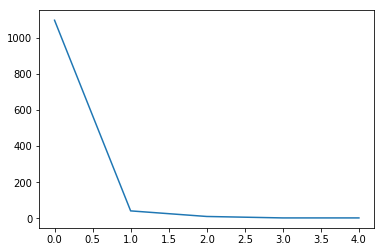

Percentage of gain: -0.04561300560136917
Total gain: -52.819860486385494
000000000000000000000000000000000000000000000000
Percentile:  0
[[269 256]
 [314 259]]
0.4808743169398907
Percentile:  1
[[ 7 11]
 [15  8]]
0.36585365853658536
Percentile:  2
[[3 0]
 [7 0]]
0.3
Percentile:  3
[[0 0]
 [2 0]]
0.0
Percentile:  4
[[0 0]
 [2 0]]
0.0
000000000000000000000000000000000000000000000000
Working on... AMZN
7.30254087059288
0.0006159569815638473
Diff in tren train and test
0.5246926892387319
0.5496117342536669
F1,score 0.6206896551724138
G-score: 0.5349439171699741
Window: 4
[[179 343]
 [196 441]]
Vol pos 0.36856448495132826
Vol neg 0.3404712796715678


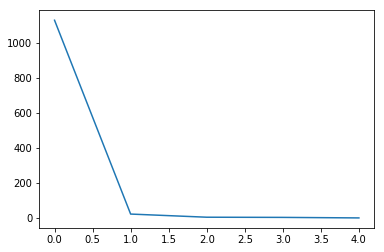

Percentage of gain: 0.038823089669411975
Total gain: 44.99596092684848
000000000000000000000000000000000000000000000000
Percentile:  0
[[173 331]
 [195 429]]
0.5336879432624113
Percentile:  1
[[ 6 10]
 [ 0  6]]
0.5454545454545454
Percentile:  2
[[0 2]
 [0 2]]
0.5
Percentile:  3
[[0 0]
 [1 2]]
0.6666666666666666
Percentile:  4
000000000000000000000000000000000000000000000000
Working on... PEP
2.357677710534418
0.0
Diff in tren train and test
0.4725598526703499
0.588495575221239
F1,score 0.4369747899159664
G-score: 0.5058997050147492
Window: 4
[[213  66]
 [269 130]]
Vol pos 0.2832837947819876
Vol neg 0.27357029249483883


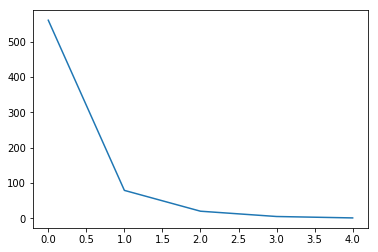

Percentage of gain: 0.00814202599476511
Total gain: 5.520293624450744
000000000000000000000000000000000000000000000000
Percentile:  0
[[186  59]
 [215 101]]
0.5115864527629234
Percentile:  1
[[21  5]
 [34 19]]
0.5063291139240507
Percentile:  2
[[ 2  2]
 [12  4]]
0.3
Percentile:  3
[[3 0]
 [0 2]]
1.0
Percentile:  4
[[1]]
1.0
000000000000000000000000000000000000000000000000
Working on... GOOGL
3.2472118959107856
0.0
Diff in tren train and test
0.5205094991364422
0.5250431778929189
F1,score 0.325748502994012
G-score: 0.5138169257340242
Window: 4
[[459  91]
 [472 136]]
Vol pos 0.3833579792398186
Vol neg 0.3959790659425972


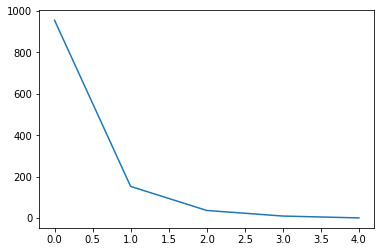

Percentage of gain: 0.004457498723670008
Total gain: 5.16178352200987
000000000000000000000000000000000000000000000000
Percentile:  0
[[384  76]
 [382 113]]
0.5204188481675392
Percentile:  1
[[62 12]
 [61 18]]
0.5228758169934641
Percentile:  2
[[ 7  2]
 [23  5]]
0.32432432432432434
Percentile:  3
[[4 1]
 [5 0]]
0.4
Percentile:  4
[[1]]
1.0
000000000000000000000000000000000000000000000000
Working on... MSFT
2.9815573770491772
0.0
Diff in tren train and test
0.5274179620034543
0.5375972342264477
F1,score 0.5593087195600942
G-score: 0.5151253241140882
Window: 4
[[240 295]
 [266 356]]
Vol pos 0.36752886246794275
Vol neg 0.3657864137898885


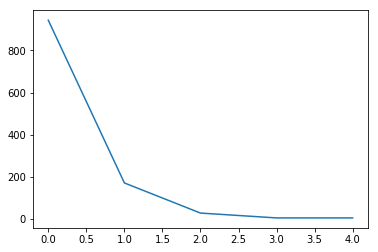

Percentage of gain: 0.011962855570238925
Total gain: 13.841023894766437
000000000000000000000000000000000000000000000000
Percentile:  0
[[189 249]
 [215 290]]
0.5079533404029692
Percentile:  1
[[44 33]
 [43 51]]
0.5555555555555556
Percentile:  2
[[ 6  6]
 [ 6 10]]
0.5714285714285714
Percentile:  3
[[1 3]
 [0 1]]
0.4
Percentile:  4
[[0 3]
 [1 1]]
0.2
000000000000000000000000000000000000000000000000
Working on... FB
8.273442632816934
0.0
Diff in tren train and test
0.5161707632600259
0.5366695427092321
F1,score 0.5255591054313099
G-score: 0.48748921484037966
Window: 4
[[236 301]
 [293 329]]
Vol pos 0.4083676898948807
Vol neg 0.4323177619653168


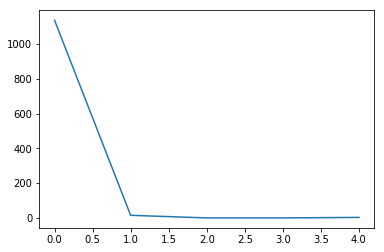

Percentage of gain: -0.02249267111025933
Total gain: -26.069005816790565
000000000000000000000000000000000000000000000000
Percentile:  0
[[233 297]
 [285 321]]
0.4876760563380282
Percentile:  1
[[3 4]
 [5 3]]
0.4
Percentile:  2
Percentile:  3
Percentile:  4
[[0 0]
 [2 1]]
0.3333333333333333
000000000000000000000000000000000000000000000000
Working on... INTC
4.729266745218887
0.0
Diff in tren train and test
0.5316946959896507
0.5220017256255393
F1,score 0.4840871021775544
G-score: 0.4685073339085418
Window: 4
[[254 300]
 [316 289]]
Vol pos 0.5445078148945053
Vol neg 0.4693934546598085


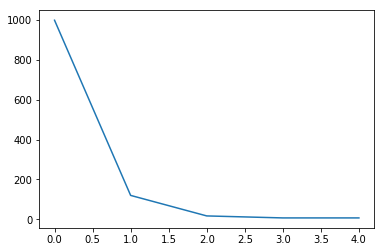

Percentage of gain: 0.005626725985568926
Total gain: 6.521375417274385
000000000000000000000000000000000000000000000000
Percentile:  0
[[214 259]
 [279 247]]
0.46146146146146144
Percentile:  1
[[30 33]
 [30 27]]
0.475
Percentile:  2
[[4 4]
 [1 8]]
0.7058823529411765
Percentile:  3
[[3 3]
 [1 0]]
0.42857142857142855
Percentile:  4
[[2 1]
 [0 4]]
0.8571428571428571
000000000000000000000000000000000000000000000000
Working on... CSCO
4.705102717031152
0.0
Diff in tren train and test
0.5432661027976577
0.5329861111111112
F1,score 0.5720858895705523
G-score: 0.515625
Window: 4
[[221 317]
 [241 373]]
Vol pos 0.3817263224808503
Vol neg 0.39536261412914464


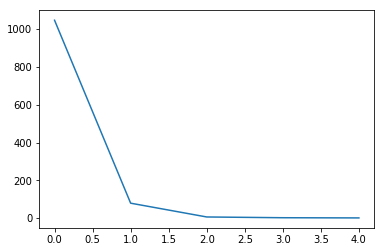

Percentage of gain: 0.005323868810384023
Total gain: 6.133096869562394
000000000000000000000000000000000000000000000000
Percentile:  0
[[205 286]
 [220 336]]
0.5167144221585482
Percentile:  1
[[14 26]
 [15 24]]
0.4810126582278481
Percentile:  2
[[0 3]
 [0 3]]
0.5
Percentile:  3
[[2]]
1.0
Percentile:  4
[[0 1]
 [0 0]]
0.0
000000000000000000000000000000000000000000000000
Working on... CMCSA
4.475308641975317
0.0
Diff in tren train and test
0.49773560491697216
0.5090595340811044
F1,score 0.3718371837183718
G-score: 0.5073339085418465
Window: 4
[[419 150]
 [421 169]]
Vol pos 0.5415700255877753
Vol neg 0.4586560595512826


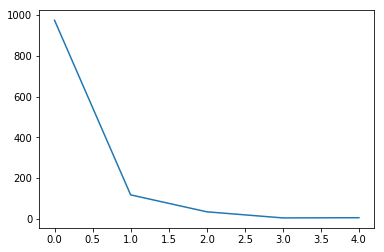

Percentage of gain: 0.04879254964782532
Total gain: 56.55056504182954
000000000000000000000000000000000000000000000000
Percentile:  0
[[347 138]
 [350 139]]
0.4989733059548255
Percentile:  1
[[50 10]
 [39 19]]
0.5847457627118644
Percentile:  2
[[19  2]
 [11  3]]
0.6285714285714286
Percentile:  3
[[2 0]
 [2 1]]
0.6
Percentile:  4
[[1 0]
 [3 2]]
0.5
000000000000000000000000000000000000000000000000
Working on... NVDA
3.9791051555757524
0.0
Diff in tren train and test
0.5204829667960328
0.546160483175151
F1,score 0.5625462620281273
G-score: 0.4900776531492666
Window: 4
[[188 338]
 [253 380]]
Vol pos 0.5684616842963469
Vol neg 0.47329741136436915


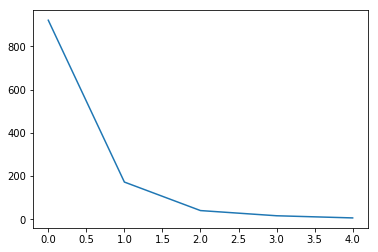

Percentage of gain: 0.037245441383936914
Total gain: 43.167466563982885
000000000000000000000000000000000000000000000000
Percentile:  0
[[157 267]
 [218 279]]
0.4733984799131379
Percentile:  1
[[21 50]
 [29 72]]
0.5406976744186046
Percentile:  2
[[ 6 12]
 [ 2 20]]
0.65
Percentile:  3
[[4 7]
 [1 4]]
0.5
Percentile:  4
[[0 1]
 [0 5]]
0.8333333333333334
000000000000000000000000000000000000000000000000
Working on... NFLX
4.082771472132831
0.00016525711528829872
Diff in tren train and test
0.516282078930343
0.542709232096635
F1,score 0.570566037735849
G-score: 0.5090595340811044
Window: 4
[[212 318]
 [251 378]]
Vol pos 0.5362312766966019
Vol neg 0.5492443951247583


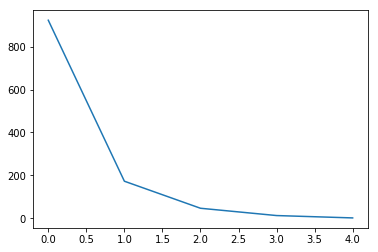

Percentage of gain: 0.003327344628997102
Total gain: 3.8563924250076407
000000000000000000000000000000000000000000000000
Percentile:  0
[[188 252]
 [197 285]]
0.5130151843817787
Percentile:  1
[[21 42]
 [40 70]]
0.5260115606936416
Percentile:  2
[[ 2 15]
 [14 16]]
0.3829787234042553
Percentile:  3
[[1 7]
 [0 5]]
0.46153846153846156
Percentile:  4
[[0 1]
 [0 1]]
0.5
000000000000000000000000000000000000000000000000
Working on... BKNG
1.1369985598232721
0.000939946799010321
Diff in tren train and test
0.5096887844979449
0.548235294117647
F1,score 0.6085106382978723
G-score: 0.5670588235294117
Window: 4
[[ 98  94]
 [ 90 143]]
Vol pos 0.2673976598147959
Vol neg 0.24082854164598047


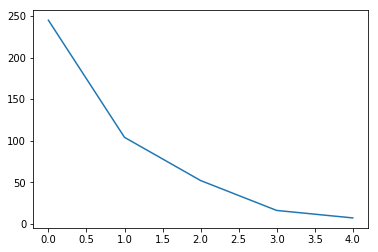

Percentage of gain: 0.047365610241189196
Total gain: 20.13038435250541
000000000000000000000000000000000000000000000000
Percentile:  0
[[58 55]
 [54 78]]
0.5551020408163265
Percentile:  1
[[17 26]
 [24 37]]
0.5192307692307693
Percentile:  2
[[17  7]
 [ 8 19]]
0.7058823529411765
Percentile:  3
[[4 2]
 [4 6]]
0.625
Percentile:  4
[[2 2]
 [0 3]]
0.7142857142857143
000000000000000000000000000000000000000000000000
Working on... ADBE
3.3983248022335957
0.0
Diff in tren train and test
0.5433326129241409
0.5501730103806228
F1,score 0.6726920593931569
G-score: 0.5614186851211073
Window: 4
[[128 392]
 [115 521]]
Vol pos 0.4552326801673165
Vol neg 0.39926091912241196


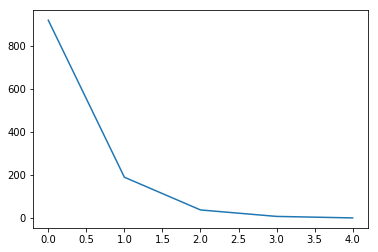

Percentage of gain: 0.08046775383522971
Total gain: 93.02072343352555
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 88 328]
 [ 90 412]]
0.5446623093681917
Percentile:  1
[[28 56]
 [22 83]]
0.5873015873015873
Percentile:  2
[[ 8  6]
 [ 3 20]]
0.7567567567567568
Percentile:  3
[[3 2]
 [0 2]]
0.7142857142857143
Percentile:  4
000000000000000000000000000000000000000000000000
Working on... AMGN
3.3162393162393125
0.0
Diff in tren train and test
0.5062988705473501
0.529105125977411
F1,score 0.43300970873786404
G-score: 0.4926151172893136
Window: 4
[[344 198]
 [386 223]]
Vol pos 0.38277270005467195
Vol neg 0.455996366588165


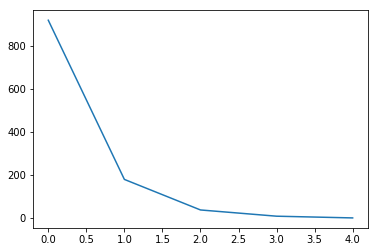

Percentage of gain: -0.04280604444525574
Total gain: -49.26975715648936
000000000000000000000000000000000000000000000000
Percentile:  0
[[290 154]
 [289 187]]
0.5184782608695652
Percentile:  1
[[41 32]
 [74 33]]
0.4111111111111111
Percentile:  2
[[10 10]
 [15  3]]
0.34210526315789475
Percentile:  3
[[1 2]
 [6 0]]
0.1111111111111111
Percentile:  4
[[1]]
1.0
000000000000000000000000000000000000000000000000
Working on... TXN
3.62011743681389
0.0
Diff in tren train and test
0.5515530629853321
0.542709232096635
F1,score 0.7017543859649122
G-score: 0.545297670405522
Window: 4
[[ 12 518]
 [  9 620]]
Vol pos 0.4336624886284704
Vol neg 0.39867204478776497


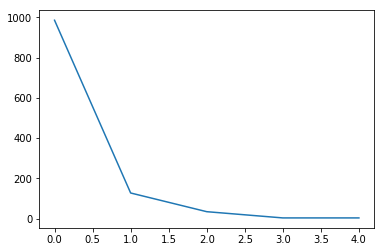

Percentage of gain: 0.05519803728217528
Total gain: 63.97452521004115
000000000000000000000000000000000000000000000000
Percentile:  0
[[  9 448]
 [  9 520]]
0.5365111561866126
Percentile:  1
[[ 2 50]
 [ 0 75]]
0.6062992125984252
Percentile:  2
[[ 1 20]
 [ 0 13]]
0.4117647058823529
Percentile:  3
[[3]]
1.0
Percentile:  4
[[3]]
1.0
000000000000000000000000000000000000000000000000
Working on... AVGO
3.5186302609745104
0.0
Diff in tren train and test
0.5185185185185185
0.5355285961871751
F1,score 0.5940054495912805
G-score: 0.48353552859618715
Window: 4
[[122 414]
 [182 436]]
Vol pos 0.4375228317227434
Vol neg 0.45221602576621617


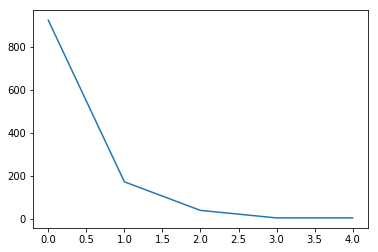

Percentage of gain: -0.02199567699772445
Total gain: -25.383011255374015
000000000000000000000000000000000000000000000000
Percentile:  0
[[103 336]
 [139 347]]
0.4864864864864865
Percentile:  1
[[16 58]
 [31 68]]
0.48554913294797686
Percentile:  2
[[ 3 12]
 [ 9 16]]
0.475
Percentile:  3
[[0 2]
 [1 2]]
0.4
Percentile:  4
[[0 5]
 [0 0]]
0.0
000000000000000000000000000000000000000000000000
Working on... PYPL
4.9430161675059505
0.0
Diff in tren train and test
0.533923941227312
0.5324114088159032
F1,score 0.6179401993355482
G-score: 0.5030250648228176
Window: 4
[[117 424]
 [151 465]]
Vol pos 0.46248327079932555
Vol neg 0.5475422108795975


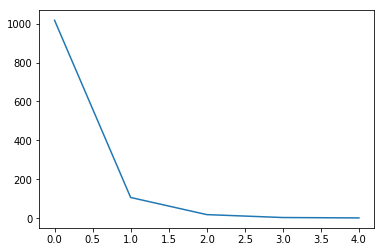

Percentage of gain: -0.03947407748535966
Total gain: -45.671507650561125
000000000000000000000000000000000000000000000000
Percentile:  0
[[107 365]
 [127 418]]
0.5162241887905604
Percentile:  1
[[ 8 47]
 [16 36]]
0.411214953271028
Percentile:  2
[[2 8]
 [4 5]]
0.3684210526315789
Percentile:  3
[[0 1]
 [3 0]]
0.0
Percentile:  4
[[0 2]
 [0 0]]
0.0
000000000000000000000000000000000000000000000000
Working on... GILD
7.47230206192292
0.0
Diff in tren train and test
0.5017301038062284
0.5242214532871973
F1,score 0.5387627251370399
G-score: 0.49048442906574397
Window: 4
[[223 327]
 [262 344]]
Vol pos 0.41899062855156965
Vol neg 0.4013319238596043


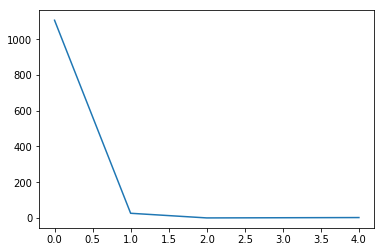

Percentage of gain: 0.0010235149095441476
Total gain: 1.1831832354330345
000000000000000000000000000000000000000000000000
Percentile:  0
[[214 322]
 [248 323]]
0.48509485094850946
Percentile:  1
[[9 1]
 [7 9]]
0.6923076923076923
Percentile:  2
Percentile:  3
[[0 1]
 [0 0]]
0.0
Percentile:  4
[[0 2]
 [0 0]]
0.0
000000000000000000000000000000000000000000000000
Working on... COST
2.3891650603631978
0.0
Diff in tren train and test
0.52858380251191
0.5398613518197574
F1,score 0.28606060606060607
G-score: 0.4896013864818024
Window: 4
[[447  84]
 [505 118]]
Vol pos 0.2872609772847807
Vol neg 0.31318660110767016


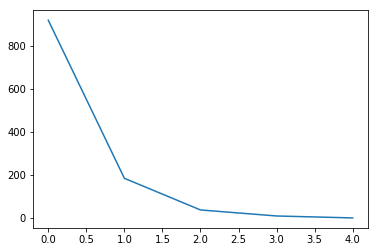

Percentage of gain: -0.019206634217085447
Total gain: -22.164455886516606
000000000000000000000000000000000000000000000000
Percentile:  0
[[364  68]
 [387  99]]
0.5043572984749455
Percentile:  1
[[70 12]
 [85 17]]
0.47282608695652173
Percentile:  2
[[ 9  3]
 [24  1]]
0.2702702702702703
Percentile:  3
[[4 1]
 [4 0]]
0.4444444444444444
Percentile:  4
000000000000000000000000000000000000000000000000
Working on... QCOM
4.165966739459091
0.0
Diff in tren train and test
0.5101380500431406
0.5254529767040552
F1,score 0.5600636435958631
G-score: 0.5228645383951682
Window: 4
[[254 296]
 [257 352]]
Vol pos 0.4569168006456903
Vol neg 0.4456641388983006


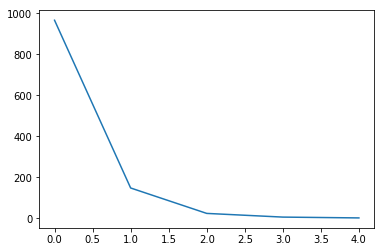

Percentage of gain: 0.026263427420645465
Total gain: 30.439312380528094
000000000000000000000000000000000000000000000000
Percentile:  0
[[219 250]
 [210 287]]
0.5238095238095238
Percentile:  1
[[30 43]
 [27 48]]
0.527027027027027
Percentile:  2
[[ 5  3]
 [11  5]]
0.4166666666666667
Percentile:  3
[[0 0]
 [2 4]]
0.6666666666666666
Percentile:  4
[[2]]
1.0
000000000000000000000000000000000000000000000000
Mean gain over portfolio :  8.655924432282422


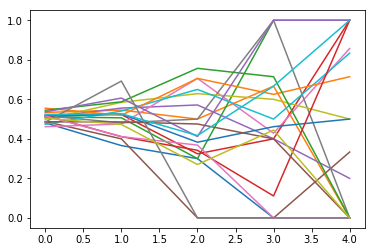

In [13]:
import warnings
warnings.filterwarnings('ignore')
o=0
accstocksresults=[]
f1stocksresults=[]
f1scoreresults=[]
aucresults=[]
chartlist=[]
gainlist=[]

for price in prices:
    #print('New price[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]')
    
   
    print('Working on...',files[o])
    
    senttemp=sentiment[o]
    senttemp=np.nan_to_num(np.asarray(senttemp, dtype=float))
    xtemp=price
    o+=1
    xtemp=np.nan_to_num(np.asarray(xtemp, dtype=float))
    xtemp=normalize(xtemp,axis=0,norm='max')
    #print(xtemp)
    accintime=[]
    trendwindowtime=[4]
    f1total=[]
    acctotal=[]
    auctotal=[]
    percfinal=[]
    f1scoretotal=[]
    percpostotal=[]
    percnegtotal=[]
    for t in trendwindowtime:
        #1
    #label because of the maket and append values without data
    #simo theroy past trend
        
        x=[]
        y=[]
        percentage=[]
        
        yvolatility=[]
        #print('============================================================')
        #print('Working on window:',t)
        #print(len(xtemp))
        ##QUI C E L'UNICO APPUNTO GUARDA SE CON +1 CAMBIA
        for i in range(0,len(price)-t-1):
            s=np.sign(price.iloc[i+t+1]['close']-price.iloc[i+1]['open'])
            percentage.append((100*(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open']) 
            if(s==-1):
                y.append(0)
            else:
                y.append(1)
            yvolatility.append((100*abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open'])
            
            x.append(senttemp[i])
        y=np.array(y)
        
        x=np.array(x)
        percentage=np.array(percentage)
        permindex=range(0,len(x))
        #permindex=np.random.permutation(permindex)
        train=0.8
        nt=math.ceil(len(x)*train)
        trainvalindex=permindex[0:nt]
        testindex=permindex[nt:]
        
        yvolatility=np.array(yvolatility)
        x_tv=[]
        y_tv=[]
        x_test=[]
        y_test=[]
        x_tv=x[trainvalindex]
        y_tv=y[trainvalindex]
        x_test=x[testindex]
        y_test=y[testindex]
        yvolatilitytest=yvolatility[testindex]
        #create structure for percentile valuation
        distribution=[]
        print(max(yvolatilitytest))
        print(min(yvolatilitytest))
        step=(max(yvolatilitytest)-min(yvolatilitytest))/5
        for v in range(0,5):
            pindexes=[]
            for r in range(0,len(y_test)):
                if(yvolatilitytest[r]<min(yvolatilitytest)+step+step*v and yvolatilitytest[r]>min(yvolatilitytest)+step*v):
                    pindexes.append(r)
            distribution.append(pindexes)
    

        cspace=np.logspace(-4,4,10)
        gspace=np.logspace(-4,4,10)
        bestsvm=None
        maxacc=0
        cvacc=0
        maxg=0
        maxc=0
        #print('Model Selection...')
        #model selection
        cvacc=0
        totu=0
        for c in cspace:
            #print()
            for g in gspace:
                
                cvacclist=[]
                #faccio cross validation
                #start with 40% as train and 10% for validation and then i move in percentege
                # 0-40 40-50
                # 0-50 50-60
                # 0-60 60-70 
                #etc test set is completely external i do in some way error extimation changin the ticker
                trainpoint=math.floor(len(x_tv)*0.40)
                dimval=math.floor(trainpoint*0.25)
                endval=trainpoint+dimval
                
                for i in range(0,6):
                    #print('-----')
                    x_train=x_tv[0:trainpoint]
                    y_train=y_tv[0:trainpoint]
                    x_val=x_tv[trainpoint:endval]
                    y_val=y_tv[trainpoint:endval]
                    #print(trainpoint)
                    #print(endval)
                    #print(len(x_tv))
                    trainpoint=trainpoint+dimval
                    endval=endval+dimval
                    p=sum(y_train)/(len(y_train)-sum(y_train))
                    rbf_svm=svm.SVC(kernel='rbf',C=c,gamma=g)
                    x_train,y_train=smote(x_train,y_train)
                    rbf_svm.fit(x_train,y_train)
                    
                    
                    if(sum(y_val)+6<len(x_val) and sum(y_val)>6):
                        x_val,y_val=smote(x_val,y_val)
                    else:
                        totu=totu+1
                    prediction=rbf_svm.predict(x_val)
                    
                    cvacclist.append(rbf_svm.score(x_val,y_val))
                    
                cvacc=sum(cvacclist)/len(cvacclist)
                if(cvacc>maxacc):
                    #print(cvacc)
                    maxacc=cvacc
                    maxg=g
                    maxc=c
                    bestsvm=rbf_svm

        
        print('Diff in tren train and test')
        print(sum(y_tv)/len(y_tv))
        print(sum(y_test)/len(y_test))
        p=sum(y_tv)/(len(y_tv)-sum(y_tv))
        rbf_svm=svm.SVC(kernel='rbf',C=maxc, gamma=maxg )
        x_tv,y_tv=smote(x_tv,y_tv)
        rbf_svm.fit(x_tv,y_tv)
        prediction=rbf_svm.predict(x_test)
        volr=[]
        voln=[]
        for j in range(0,len(x_test)):
            if(y_test[j]==prediction[j]):
                volr.append(yvolatilitytest[j])
            else:
                voln.append(yvolatilitytest[j])
        confmatrix=confusion_matrix(y_test, prediction)
        CM = f1_score(y_test, prediction)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
        auc=metrics.auc(fpr, tpr)
        valueacc=rbf_svm.score(x_test,y_test)
        
        print('F1,score',CM)
        print('G-score:',valueacc)
        print('Window:',t)
        print(confmatrix)
        print('Vol pos',sum(volr)/len(volr))
        print('Vol neg',sum(voln)/len(voln))
        percnegtotal.append(sum(volr)/len(volr))
        percpostotal.append(sum(voln)/len(voln))
        #build structure to plot distribution onver percentile
        chart=np.zeros(5)
        for r in range(0,len(y_test)):
            for v in range(0,5):
                if(yvolatilitytest[r]<min(yvolatility)+step+step*v and yvolatilitytest[r]>min(yvolatility)+step*v):
                    chart[v]+=1
        plt.plot(chart)
        plt.show()
        
        print('Percentage of gain:',(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('Total gain:',len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        gainlist.append(len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('000000000000000000000000000000000000000000000000')
        #performances for each percentile
        chartscore=[]
        for g in range(0,len(distribution)):
            print('Percentile: ',g)
            tempscore=0
            if(len(distribution[g])>0):
                predictionp=rbf_svm.predict(x_test[distribution[g]])
                print(confusion_matrix(y_test[distribution[g]], predictionp))
                print(rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]]))
                tempscore=rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]])
            chartscore.append(tempscore)    
        chartlist.append(chartscore)
        print('000000000000000000000000000000000000000000000000')
print('Mean gain over portfolio : ', sum(gainlist)/len(gainlist))
#print all the accuracy varing the percentile
for st in range(0,len(chartlist)):
    plt.plot(chartlist[st])
plt.show()
        
        
        

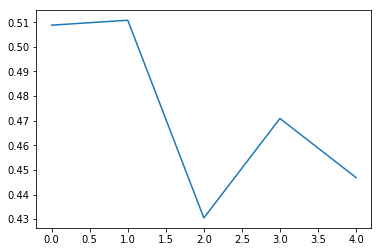

In [14]:
tot=np.zeros(5)
for st in range(0,len(chartlist)):
    tot=chartlist[st]+tot
    
tot=tot/20
plt.plot(tot)
plt.show()


Working on... AAPL
6.2151820652697705
0.0025906064609701575
Diff in tren train and test
0.5259050509429872
0.5602775368603643
F1,score 0.6289655172413793
G-score: 0.5333911535125759
Window: 28
[[159 348]
 [190 456]]
Vol pos 0.9426123331316257
Vol neg 1.0121399886428042


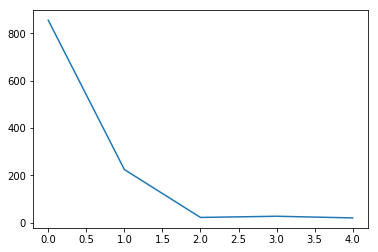

Percentage of gain: 0.030507607099844906
Total gain: 35.17527098612118
000000000000000000000000000000000000000000000000
Percentile:  0
[[126 277]
 [120 331]]
0.5351288056206089
Percentile:  1
[[31 68]
 [39 87]]
0.5244444444444445
Percentile:  2
[[ 2  2]
 [ 3 16]]
0.782608695652174
Percentile:  3
[[ 0  0]
 [13 15]]
0.5357142857142857
Percentile:  4
[[ 0  0]
 [15  6]]
0.2857142857142857
000000000000000000000000000000000000000000000000
Working on... AMZN
12.157084770188899
0.000917344130579077
Diff in tren train and test
0.5682113469034213
0.6377816291161178
F1,score 0.6094674556213019
G-score: 0.5424610051993067
Window: 28
[[214 204]
 [324 412]]
Vol pos 1.0343463290251012
Vol neg 1.0293914763263996


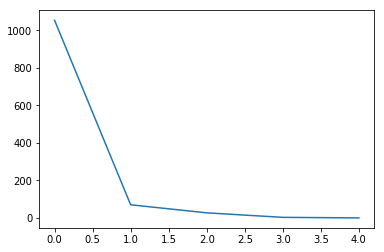

Percentage of gain: 0.09010580803238669
Total gain: 103.98210246937424
000000000000000000000000000000000000000000000000
Percentile:  0
[[204 180]
 [295 373]]
0.5484790874524715
Percentile:  1
[[ 6 20]
 [22 22]]
0.4
Percentile:  2
[[ 3  4]
 [ 5 15]]
0.6666666666666666
Percentile:  3
[[0 0]
 [2 1]]
0.3333333333333333
Percentile:  4
000000000000000000000000000000000000000000000000
Working on... PEP
2.3687214611872096
0.0
Diff in tren train and test
0.44881305637982194
0.75037147102526
F1,score 0.8083333333333333
G-score: 0.7265973254086181
Window: 28
[[101  67]
 [117 388]]
Vol pos 0.7137548098889143
Vol neg 0.7048677717377452


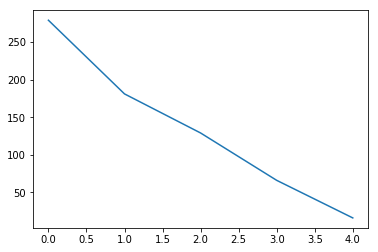

Percentage of gain: 0.3258996018364546
Total gain: 219.3304320359339
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 57  39]
 [ 42 141]]
0.7096774193548387
Percentile:  1
[[ 18  14]
 [ 24 125]]
0.7900552486187845
Percentile:  2
[[ 7 11]
 [34 77]]
0.6511627906976745
Percentile:  3
[[11  3]
 [16 36]]
0.7121212121212122
Percentile:  4
[[8 0]
 [1 7]]
0.9375
000000000000000000000000000000000000000000000000
Working on... GOOGL
5.878547598584186
0.00042690345577337966
Diff in tren train and test
0.5547366139171905
0.562012142237641
F1,score 0.6549780839073263
G-score: 0.5221162185602776
Window: 28
[[ 79 426]
 [125 523]]
Vol pos 1.2525462795254492
Vol neg 1.1616136477640007


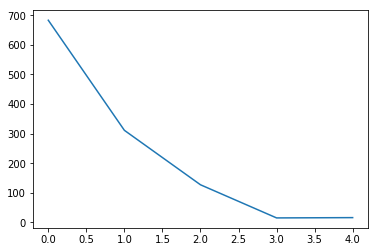

Percentage of gain: 0.09885840447212148
Total gain: 113.98374035635605
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 64 267]
 [ 68 283]]
0.5087976539589443
Percentile:  1
[[  8 117]
 [ 39 148]]
0.5
Percentile:  2
[[ 4 19]
 [17 86]]
0.7142857142857143
Percentile:  3
[[0 8]
 [1 6]]
0.4
Percentile:  4
[[ 3 13]
 [ 0  0]]
0.1875
000000000000000000000000000000000000000000000000
Working on... MSFT
6.174452793204837
0.0
Diff in tren train and test
0.5552905464006939
0.5897658282740676
F1,score 0.5720620842572062
G-score: 0.4978317432784042
Window: 28
[[187 286]
 [293 387]]
Vol pos 0.7914043207406808
Vol neg 0.8948626794918157


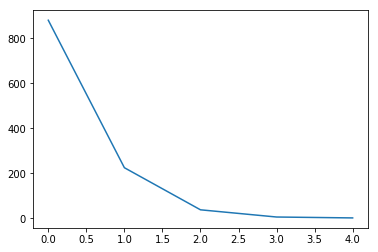

Percentage of gain: -0.05538543913322684
Total gain: -63.85941132061054
000000000000000000000000000000000000000000000000
Percentile:  0
[[151 211]
 [219 299]]
0.5113636363636364
Percentile:  1
[[30 63]
 [61 71]]
0.4488888888888889
Percentile:  2
[[ 4  7]
 [11 16]]
0.5263157894736842
Percentile:  3
[[1 4]
 [1 0]]
0.16666666666666666
Percentile:  4
[[1 1]
 [0 0]]
0.5
000000000000000000000000000000000000000000000000
Working on... FB
10.887151375939736
0.0
Diff in tren train and test
0.5323663130547738
0.58578856152513
F1,score 0.5103562551781275
G-score: 0.4878682842287695
Window: 28
[[255 223]
 [368 308]]
Vol pos 1.2698243322949965
Vol neg 1.3171957464812611


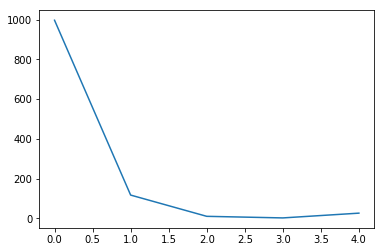

Percentage of gain: -0.05507069938331234
Total gain: -63.55158708834244
000000000000000000000000000000000000000000000000
Percentile:  0
[[225 218]
 [299 255]]
0.48144433299899697
Percentile:  1
[[20  5]
 [49 43]]
0.5384615384615384
Percentile:  2
[[10]]
1.0
Percentile:  3
[[0 0]
 [2 0]]
0.0
Percentile:  4
[[ 0  0]
 [17  9]]
0.34615384615384615
000000000000000000000000000000000000000000000000
Working on... INTC
8.395303326810174
0.0
Diff in tren train and test
0.5555315003247456
0.5433275563258232
F1,score 0.5334394904458598
G-score: 0.49220103986135183
Window: 28
[[233 294]
 [292 335]]
Vol pos 1.1829484103719363
Vol neg 1.2542197091098246


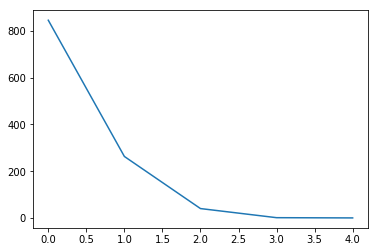

Percentage of gain: -0.054643026383966495
Total gain: -63.058052447097346
000000000000000000000000000000000000000000000000
Percentile:  0
[[182 195]
 [229 240]]
0.4988179669030733
Percentile:  1
[[44 71]
 [61 87]]
0.49809885931558934
Percentile:  2
[[ 7 27]
 [ 1  5]]
0.3
Percentile:  3
[[0 1]
 [0 0]]
0.0
Percentile:  4
000000000000000000000000000000000000000000000000
Working on... CSCO
5.061619718309853
0.0
Diff in tren train and test
0.5903745644599303
0.5213600697471665
F1,score 0.5543237250554324
G-score: 0.4742807323452485
Window: 28
[[169 380]
 [223 375]]
Vol pos 0.9200786621639633
Vol neg 0.9617396180366254


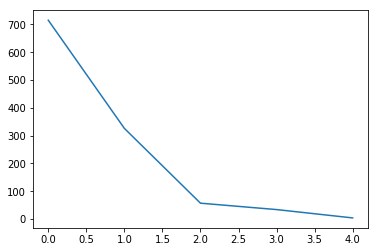

Percentage of gain: -0.06922946596241426
Total gain: -79.40619745888915
000000000000000000000000000000000000000000000000
Percentile:  0
[[122 201]
 [172 220]]
0.4783216783216783
Percentile:  1
[[ 41 129]
 [ 41 115]]
0.4785276073619632
Percentile:  2
[[ 4 23]
 [ 3 27]]
0.543859649122807
Percentile:  3
[[ 1 23]
 [ 2  8]]
0.2647058823529412
Percentile:  4
[[1 3]
 [0 0]]
0.25
000000000000000000000000000000000000000000000000
Working on... CMCSA
8.98261429491308
0.0
Diff in tren train and test
0.4686011260285838
0.5051993067590987
F1,score 0.24415584415584418
G-score: 0.49566724436741766
Window: 28
[[478  93]
 [489  94]]
Vol pos 1.4751787332430837
Vol neg 1.4301411670506974


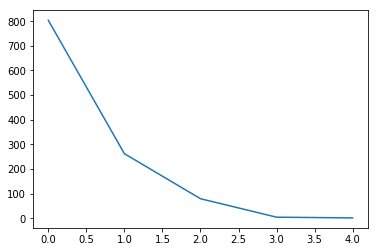

Percentage of gain: 0.009930741933741823
Total gain: 11.460076191538064
000000000000000000000000000000000000000000000000
Percentile:  0
[[316  75]
 [341  72]]
0.48258706467661694
Percentile:  1
[[124  16]
 [104  18]]
0.5419847328244275
Percentile:  2
[[36  2]
 [38  3]]
0.4936708860759494
Percentile:  3
[[2 0]
 [2 0]]
0.5
Percentile:  4
[[0 0]
 [1 0]]
0.0
000000000000000000000000000000000000000000000000
Working on... NVDA
7.248431726389965
0.007644967700004514
Diff in tren train and test
0.5743667460489283
0.5805892547660312
F1,score 0.2104046242774566
G-score: 0.40814558058925476
Window: 28
[[380 104]
 [579  91]]
Vol pos 1.5194433416466913
Vol neg 1.3802001854856456


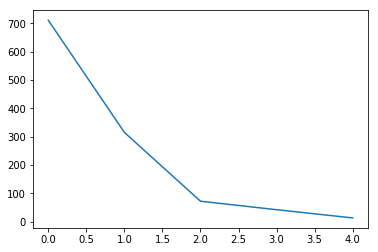

Percentage of gain: -0.1967234946023435
Total gain: -227.0189127711044
000000000000000000000000000000000000000000000000
Percentile:  0
[[239  78]
 [351  44]]
0.39747191011235955
Percentile:  1
[[ 97  24]
 [176  16]]
0.3610223642172524
Percentile:  2
[[20  2]
 [32 19]]
0.5342465753424658
Percentile:  3
[[21  0]
 [ 8 12]]
0.8048780487804879
Percentile:  4
[[ 3  0]
 [10  0]]
0.23076923076923078
000000000000000000000000000000000000000000000000
Working on... NFLX
7.410943467100719
0.001406110187899634
Diff in tren train and test
0.56691208315288
0.610051993067591
F1,score 0.7551240560949299
G-score: 0.6065857885615251
Window: 28
[[  0 450]
 [  4 700]]
Vol pos 1.7935883964135937
Vol neg 1.273137746830202


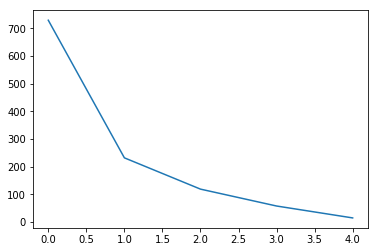

Percentage of gain: 0.5870947490715805
Total gain: 677.5073404286039
000000000000000000000000000000000000000000000000
Percentile:  0
[[  0 350]
 [  2 376]]
0.5164835164835165
Percentile:  1
[[  0  63]
 [  2 167]]
0.7198275862068966
Percentile:  2
[[  0  15]
 [  0 104]]
0.8739495798319328
Percentile:  3
[[ 0 11]
 [ 0 47]]
0.8103448275862069
Percentile:  4
[[ 0 10]
 [ 0  5]]
0.3333333333333333
000000000000000000000000000000000000000000000000
Working on... BKNG
2.5815320081626525
0.0014318988888343074
Diff in tren train and test
0.5552256532066508
0.6166666666666667
F1,score 0.63003663003663
G-score: 0.5190476190476191
Window: 28
[[ 46 115]
 [ 87 172]]
Vol pos 0.6187644187544823
Vol neg 0.47999710422021286


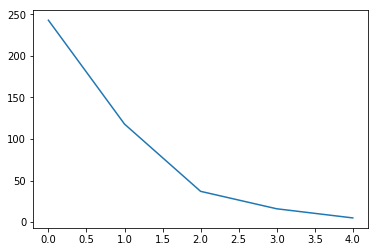

Percentage of gain: 0.09031244818093846
Total gain: 37.931228235994155
000000000000000000000000000000000000000000000000
Percentile:  0
[[28 65]
 [69 80]]
0.4462809917355372
Percentile:  1
[[13 33]
 [18 54]]
0.5677966101694916
Percentile:  2
[[ 5  3]
 [ 0 29]]
0.918918918918919
Percentile:  3
[[0 9]
 [0 7]]
0.4375
Percentile:  4
[[0 4]
 [0 2]]
0.3333333333333333
000000000000000000000000000000000000000000000000
Working on... ADBE
5.959915611814346
0.0
Diff in tren train and test
0.5740017361111112
0.6611642050390965
F1,score 0.6449826989619377
G-score: 0.5543006081668115
Window: 28
[[172 218]
 [295 466]]
Vol pos 1.0255608165208736
Vol neg 1.230311840817907


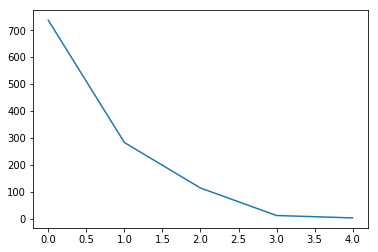

Percentage of gain: 0.020119745091860243
Total gain: 23.15782660073114
000000000000000000000000000000000000000000000000
Percentile:  0
[[105 124]
 [188 320]]
0.576662143826323
Percentile:  1
[[ 49  55]
 [ 72 107]]
0.5512367491166078
Percentile:  2
[[17 28]
 [35 34]]
0.4473684210526316
Percentile:  3
[[1 7]
 [0 4]]
0.4166666666666667
Percentile:  4
[[0 3]
 [0 0]]
0.0
000000000000000000000000000000000000000000000000
Working on... AMGN
5.291005291005295
0.0
Diff in tren train and test
0.5079607415485278
0.6003490401396161
F1,score 0.4705882352941177
G-score: 0.46596858638743455
Window: 28
[[262 196]
 [416 272]]
Vol pos 1.012225727898169
Vol neg 1.0678530259748762


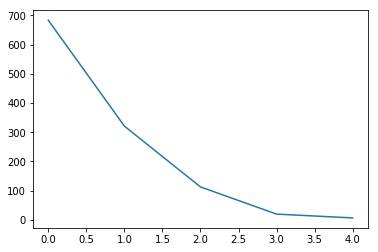

Percentage of gain: -0.09860166945811694
Total gain: -112.99751319900201
000000000000000000000000000000000000000000000000
Percentile:  0
[[160 123]
 [225 175]]
0.4904831625183016
Percentile:  1
[[ 57  48]
 [135  81]]
0.42990654205607476
Percentile:  2
[[25 18]
 [54 16]]
0.36283185840707965
Percentile:  3
[[16  3]
 [ 1  0]]
0.8
Percentile:  4
[[4 3]
 [0 0]]
0.5714285714285714
000000000000000000000000000000000000000000000000
Working on... TXN
5.987780040733193
0.0
Diff in tren train and test
0.6268139484513754
0.5901213171577123
F1,score 0.7422343324250681
G-score: 0.5901213171577123
Window: 28
[[  0 473]
 [  0 681]]
Vol pos 1.0687384040887404
Vol neg 0.7747557931041097


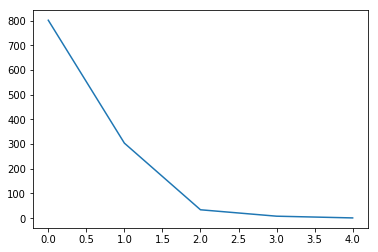

Percentage of gain: 0.31312943071593446
Total gain: 361.3513630461884
000000000000000000000000000000000000000000000000
Percentile:  0
[[  0 376]
 [  0 426]]
0.5311720698254364
Percentile:  1
[[  0  96]
 [  0 208]]
0.6842105263157895
Percentile:  2
[[ 0  1]
 [ 0 33]]
0.9705882352941176
Percentile:  3
[[8]]
1.0
Percentile:  4
[[1]]
1.0
000000000000000000000000000000000000000000000000
Working on... AVGO
5.610368642927625
0.0
Diff in tren train and test
0.48368856024358414
0.6127067014795474
F1,score 0.38943248532289626
G-score: 0.45691906005221933
Window: 28
[[326 119]
 [505 199]]
Vol pos 1.1883716470787828
Vol neg 1.2580539043145944


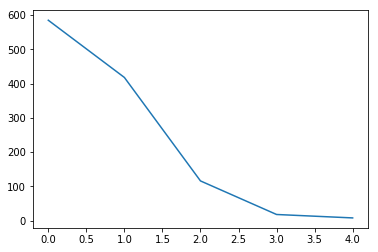

Percentage of gain: -0.14023544088420006
Total gain: -161.13052157594586
000000000000000000000000000000000000000000000000
Percentile:  0
[[129  68]
 [255 133]]
0.4478632478632479
Percentile:  1
[[162  32]
 [174  50]]
0.507177033492823
Percentile:  2
[[26 16]
 [60 14]]
0.3448275862068966
Percentile:  3
[[7 3]
 [8 0]]
0.3888888888888889
Percentile:  4
[[2 0]
 [6 0]]
0.25
000000000000000000000000000000000000000000000000
Working on... PYPL
6.66413758219524
0.0
Diff in tren train and test
0.5868952050336299
0.6302083333333334
F1,score 0.599862731640357
G-score: 0.4939236111111111
Window: 28
[[132 294]
 [289 437]]
Vol pos 1.117998789353152
Vol neg 1.5850706239723407


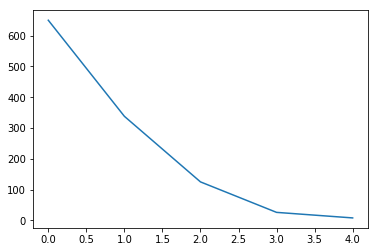

Percentage of gain: -0.2499608182586208
Total gain: -287.95486263393116
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 84 154]
 [140 272]]
0.5476923076923077
Percentile:  1
[[ 30  74]
 [ 86 148]]
0.5266272189349113
Percentile:  2
[[17 40]
 [57 11]]
0.224
Percentile:  3
[[ 1 17]
 [ 5  3]]
0.15384615384615385
Percentile:  4
[[0 8]
 [0 0]]
0.0
000000000000000000000000000000000000000000000000
Working on... GILD
7.934752557367997
0.0
Diff in tren train and test
0.4751357220412595
0.5360556038227628
F1,score 0.5460636515912898
G-score: 0.529105125977411
Window: 28
[[283 251]
 [291 326]]
Vol pos 1.1239154996786707
Vol neg 0.9757719728833947


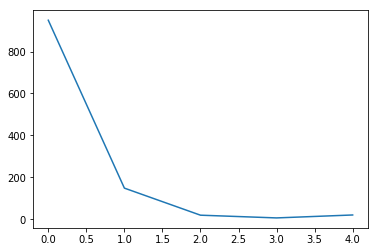

Percentage of gain: 0.13518343179974845
Total gain: 155.59613000151046
000000000000000000000000000000000000000000000000
Percentile:  0
[[228 213]
 [254 254]]
0.5079030558482613
Percentile:  1
[[29 19]
 [34 67]]
0.6442953020134228
Percentile:  2
[[11  5]
 [ 2  2]]
0.65
Percentile:  3
[[3 4]
 [0 0]]
0.42857142857142855
Percentile:  4
[[11 10]
 [ 0  0]]
0.5238095238095238
000000000000000000000000000000000000000000000000
Working on... COST
2.7652341569841132
0.0027343749999936273
Diff in tren train and test
0.5562078712763644
0.577023498694517
F1,score 0.2899543378995434
G-score: 0.4586597040905135
Window: 28
[[400  86]
 [536 127]]
Vol pos 0.6118584044125606
Vol neg 0.7889828130218015


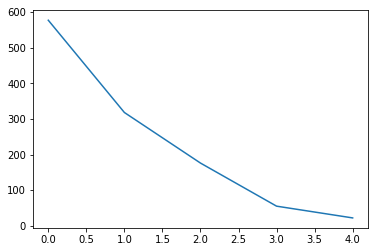

Percentage of gain: -0.14647339475556237
Total gain: -168.29793057414116
000000000000000000000000000000000000000000000000
Percentile:  0
[[231  35]
 [239  74]]
0.5267702936096719
Percentile:  1
[[110  21]
 [162  23]]
0.4208860759493671
Percentile:  2
[[47 27]
 [81 21]]
0.38636363636363635
Percentile:  3
[[10  3]
 [35  6]]
0.2962962962962963
Percentile:  4
[[ 2  0]
 [17  3]]
0.22727272727272727
000000000000000000000000000000000000000000000000
Working on... QCOM
6.459999999999993
0.0
Diff in tren train and test
0.5057396577864414
0.5771230502599654
F1,score 0.716695753344968
G-score: 0.5779896013864818
Window: 28
[[ 51 437]
 [ 50 616]]
Vol pos 1.3698322069155826
Vol neg 1.09364300768898


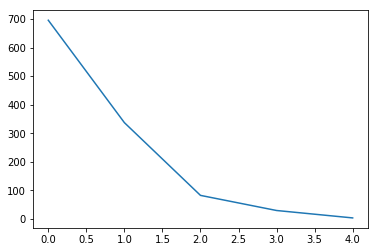

Percentage of gain: 0.3302200496257888
Total gain: 381.0739372681603
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 42 265]
 [ 43 346]]
0.5574712643678161
Percentile:  1
[[  9 148]
 [  2 178]]
0.5548961424332344
Percentile:  2
[[ 0 24]
 [ 1 57]]
0.6951219512195121
Percentile:  3
[[ 0  0]
 [ 2 27]]
0.9310344827586207
Percentile:  4
[[3]]
1.0
000000000000000000000000000000000000000000000000
Mean gain over portfolio :  44.66372292757238


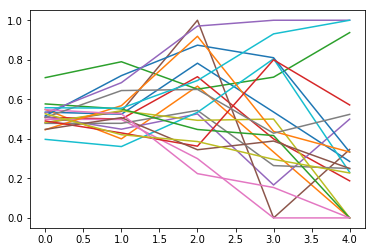

In [15]:
import warnings
warnings.filterwarnings('ignore')
o=0
accstocksresults=[]
f1stocksresults=[]
f1scoreresults=[]
aucresults=[]
chartlist=[]
gainlist=[]

for price in prices:
    #print('New price[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]')
    
   
    print('Working on...',files[o])
    
    senttemp=sentiment[o]
    senttemp=np.nan_to_num(np.asarray(senttemp, dtype=float))
    xtemp=price
    o+=1
    xtemp=np.nan_to_num(np.asarray(xtemp, dtype=float))
    xtemp=normalize(xtemp,axis=0,norm='max')
    #print(xtemp)
    accintime=[]
    trendwindowtime=[28]
    f1total=[]
    acctotal=[]
    auctotal=[]
    percfinal=[]
    f1scoretotal=[]
    percpostotal=[]
    percnegtotal=[]
    for t in trendwindowtime:
        #1
    #label because of the maket and append values without data
    #simo theroy past trend
        
        x=[]
        y=[]
        percentage=[]
        
        yvolatility=[]
        #print('============================================================')
        #print('Working on window:',t)
        #print(len(xtemp))
        ##QUI C E L'UNICO APPUNTO GUARDA SE CON +1 CAMBIA
        for i in range(0,len(price)-t-1):
            s=np.sign(price.iloc[i+t+1]['close']-price.iloc[i+1]['open'])
            percentage.append((100*(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open']) 
            if(s==-1):
                y.append(0)
            else:
                y.append(1)
            yvolatility.append((100*abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open'])
            
            x.append(senttemp[i])
        y=np.array(y)
        
        x=np.array(x)
        percentage=np.array(percentage)
        permindex=range(0,len(x))
        #permindex=np.random.permutation(permindex)
        train=0.8
        nt=math.ceil(len(x)*train)
        trainvalindex=permindex[0:nt]
        testindex=permindex[nt:]
        
        yvolatility=np.array(yvolatility)
        x_tv=[]
        y_tv=[]
        x_test=[]
        y_test=[]
        x_tv=x[trainvalindex]
        y_tv=y[trainvalindex]
        x_test=x[testindex]
        y_test=y[testindex]
        yvolatilitytest=yvolatility[testindex]
        #create structure for percentile valuation
        distribution=[]
        print(max(yvolatilitytest))
        print(min(yvolatilitytest))
        step=(max(yvolatilitytest)-min(yvolatilitytest))/5
        for v in range(0,5):
            pindexes=[]
            for r in range(0,len(y_test)):
                if(yvolatilitytest[r]<min(yvolatilitytest)+step+step*v and yvolatilitytest[r]>min(yvolatilitytest)+step*v):
                    pindexes.append(r)
            distribution.append(pindexes)
    

        cspace=np.logspace(-4,4,10)
        gspace=np.logspace(-4,4,10)
        bestsvm=None
        maxacc=0
        cvacc=0
        maxg=0
        maxc=0
        #print('Model Selection...')
        #model selection
        cvacc=0
        totu=0
        for c in cspace:
            #print()
            for g in gspace:
                
                cvacclist=[]
                #faccio cross validation
                #start with 40% as train and 10% for validation and then i move in percentege
                # 0-40 40-50
                # 0-50 50-60
                # 0-60 60-70 
                #etc test set is completely external i do in some way error extimation changin the ticker
                trainpoint=math.floor(len(x_tv)*0.40)
                dimval=math.floor(trainpoint*0.25)
                endval=trainpoint+dimval
                
                for i in range(0,6):
                    #print('-----')
                    x_train=x_tv[0:trainpoint]
                    y_train=y_tv[0:trainpoint]
                    x_val=x_tv[trainpoint:endval]
                    y_val=y_tv[trainpoint:endval]
                    #print(trainpoint)
                    #print(endval)
                    #print(len(x_tv))
                    trainpoint=trainpoint+dimval
                    endval=endval+dimval
                    p=sum(y_train)/(len(y_train)-sum(y_train))
                    rbf_svm=svm.SVC(kernel='rbf',C=c,gamma=g)
                    x_train,y_train=smote(x_train,y_train)
                    rbf_svm.fit(x_train,y_train)
                    
                    
                    if(sum(y_val)+6<len(x_val) and sum(y_val)>6):
                        x_val,y_val=smote(x_val,y_val)
                    else:
                        totu=totu+1
                    prediction=rbf_svm.predict(x_val)
                    
                    cvacclist.append(rbf_svm.score(x_val,y_val))
                    
                cvacc=sum(cvacclist)/len(cvacclist)
                if(cvacc>maxacc):
                    #print(cvacc)
                    maxacc=cvacc
                    maxg=g
                    maxc=c
                    bestsvm=rbf_svm

        
        print('Diff in tren train and test')
        print(sum(y_tv)/len(y_tv))
        print(sum(y_test)/len(y_test))
        p=sum(y_tv)/(len(y_tv)-sum(y_tv))
        rbf_svm=svm.SVC(kernel='rbf',C=maxc, gamma=maxg )
        x_tv,y_tv=smote(x_tv,y_tv)
        rbf_svm.fit(x_tv,y_tv)
        prediction=rbf_svm.predict(x_test)
        volr=[]
        voln=[]
        for j in range(0,len(x_test)):
            if(y_test[j]==prediction[j]):
                volr.append(yvolatilitytest[j])
            else:
                voln.append(yvolatilitytest[j])
        confmatrix=confusion_matrix(y_test, prediction)
        CM = f1_score(y_test, prediction)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
        auc=metrics.auc(fpr, tpr)
        valueacc=rbf_svm.score(x_test,y_test)
        
        print('F1,score',CM)
        print('G-score:',valueacc)
        print('Window:',t)
        print(confmatrix)
        print('Vol pos',sum(volr)/len(volr))
        print('Vol neg',sum(voln)/len(voln))
        percnegtotal.append(sum(volr)/len(volr))
        percpostotal.append(sum(voln)/len(voln))
        #build structure to plot distribution onver percentile
        chart=np.zeros(5)
        for r in range(0,len(y_test)):
            for v in range(0,5):
                if(yvolatilitytest[r]<min(yvolatility)+step+step*v and yvolatilitytest[r]>min(yvolatility)+step*v):
                    chart[v]+=1
        plt.plot(chart)
        plt.show()
        
        print('Percentage of gain:',(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('Total gain:',len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        gainlist.append(len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('000000000000000000000000000000000000000000000000')
        #performances for each percentile
        chartscore=[]
        for g in range(0,len(distribution)):
            print('Percentile: ',g)
            tempscore=0
            if(len(distribution[g])>0):
                predictionp=rbf_svm.predict(x_test[distribution[g]])
                print(confusion_matrix(y_test[distribution[g]], predictionp))
                print(rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]]))
                tempscore=rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]])
            chartscore.append(tempscore)    
        chartlist.append(chartscore)
        print('000000000000000000000000000000000000000000000000')
print('Mean gain over portfolio : ', sum(gainlist)/len(gainlist))
#print all the accuracy varing the percentile
for st in range(0,len(chartlist)):
    plt.plot(chartlist[st])
plt.show()
        
        
        

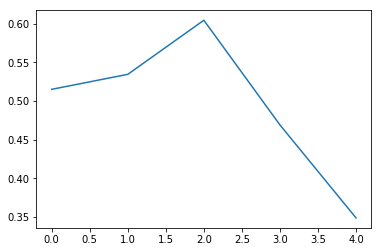

In [16]:
tot=np.zeros(5)
for st in range(0,len(chartlist)):
    tot=chartlist[st]+tot
    
tot=tot/20
plt.plot(tot)
plt.show()

Working on... AAPL
15.571701720841297
0.005338458253266777
Diff in tren train and test
0.5490716180371353
0.552212389380531
F1,score 0.5425101214574899
G-score: 0.5
Window: 140
[[230 276]
 [289 335]]
Vol pos 2.762662859575734
Vol neg 3.5855467370650937


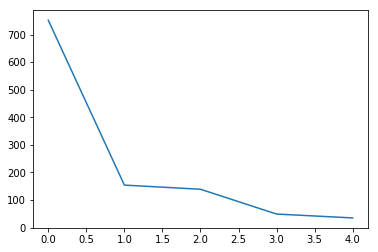

Percentage of gain: -0.41144193874467994
Total gain: -464.9293907814884
000000000000000000000000000000000000000000000000
Percentile:  0
[[183 195]
 [141 234]]
0.5537848605577689
Percentile:  1
[[25 43]
 [53 31]]
0.3684210526315789
Percentile:  2
[[22 38]
 [46 33]]
0.39568345323741005
Percentile:  3
[[ 0  0]
 [36 13]]
0.2653061224489796
Percentile:  4
[[ 0  0]
 [12 23]]
0.6571428571428571
000000000000000000000000000000000000000000000000
Working on... AMZN
11.150617492631287
0.0007590184265374819
Diff in tren train and test
0.6817579505300353
0.7782685512367491
F1,score 0.625923438549362
G-score: 0.5079505300353356
Window: 140
[[109 142]
 [415 466]]
Vol pos 2.3965341464248007
Vol neg 2.3282649457910707


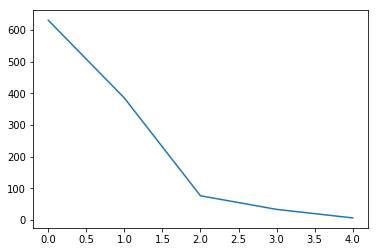

Percentage of gain: 0.07169925741045405
Total gain: 81.16355938863398
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 86 113]
 [221 210]]
0.46984126984126984
Percentile:  1
[[ 17  19]
 [139 210]]
0.5896103896103896
Percentile:  2
[[ 6 10]
 [32 28]]
0.4473684210526316
Percentile:  3
[[ 0  0]
 [21 12]]
0.36363636363636365
Percentile:  4
[[0 0]
 [2 4]]
0.6666666666666666
000000000000000000000000000000000000000000000000
Working on... PEP
5.495274763738178
0.0
Diff in tren train and test
0.3288564850345357
0.8602150537634409
F1,score 0.8720379146919431
G-score: 0.7926267281105991
Window: 140
[[ 56  35]
 [100 460]]
Vol pos 2.293844624533855
Vol neg 1.274133749713516


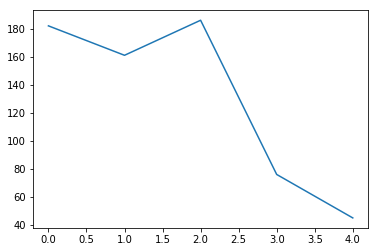

Percentage of gain: 1.5539412750355521
Total gain: 1011.6157700481444
000000000000000000000000000000000000000000000000
Percentile:  0
[[37 35]
 [20 90]]
0.6978021978021978
Percentile:  1
[[19  0]
 [56 86]]
0.6521739130434783
Percentile:  2
[[  0   0]
 [ 23 163]]
0.8763440860215054
Percentile:  3
[[ 0  0]
 [ 1 75]]
0.9868421052631579
Percentile:  4
[[45]]
1.0
000000000000000000000000000000000000000000000000
Working on... GOOGL
9.280622946926826
0.003477111910863453
Diff in tren train and test
0.6279840848806366
0.5973451327433629
F1,score 0.5476973684210527
G-score: 0.5132743362831859
Window: 140
[[247 208]
 [342 333]]
Vol pos 3.008825381994363
Vol neg 2.8988392107667424


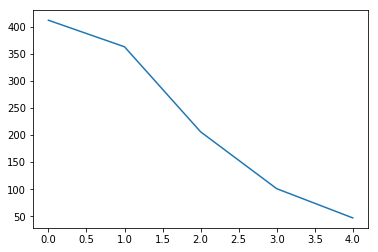

Percentage of gain: 0.1334134120663913
Total gain: 150.75715563502217
000000000000000000000000000000000000000000000000
Percentile:  0
[[116 116]
 [100  79]]
0.4744525547445255
Percentile:  1
[[ 66  45]
 [103 149]]
0.5922865013774105
Percentile:  2
[[60 37]
 [76 33]]
0.45145631067961167
Percentile:  3
[[ 4 10]
 [51 36]]
0.39603960396039606
Percentile:  4
[[ 0  0]
 [12 35]]
0.7446808510638298
000000000000000000000000000000000000000000000000
Working on... MSFT
5.843279709392834
0.0
Diff in tren train and test
0.6778686712359053
0.6292035398230088
F1,score 0.7302904564315353
G-score: 0.5973451327433629
Window: 140
[[ 59 360]
 [ 95 616]]
Vol pos 1.8059824439663834
Vol neg 1.2326072611532908


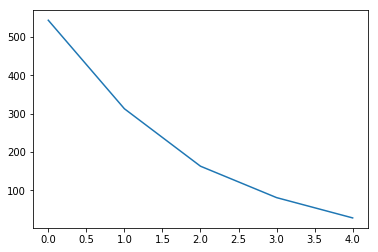

Percentage of gain: 0.5824795096040367
Total gain: 658.2018458525615
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 36 256]
 [ 32 220]]
0.47058823529411764
Percentile:  1
[[  7  67]
 [ 40 199]]
0.65814696485623
Percentile:  2
[[  7  16]
 [ 19 121]]
0.7852760736196319
Percentile:  3
[[ 8 12]
 [ 4 57]]
0.8024691358024691
Percentile:  4
[[ 1  9]
 [ 0 18]]
0.6785714285714286
000000000000000000000000000000000000000000000000
Working on... FB
12.871078806426938
0.005182421227207363
Diff in tren train and test
0.5687789799072643
0.7676678445229682
F1,score 0.6482377332411887
G-score: 0.5503533568904594
Window: 140
[[154 109]
 [400 469]]
Vol pos 3.0188003167239055
Vol neg 3.149724169469412


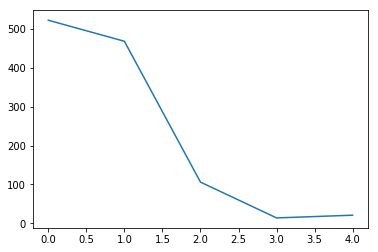

Percentage of gain: 0.24514398856807654
Total gain: 277.50299505906264
000000000000000000000000000000000000000000000000
Percentile:  0
[[118  94]
 [135 175]]
0.5613026819923371
Percentile:  1
[[ 23  14]
 [192 239]]
0.5598290598290598
Percentile:  2
[[12  1]
 [51 41]]
0.5047619047619047
Percentile:  3
[[ 0  0]
 [13  1]]
0.07142857142857142
Percentile:  4
[[ 0  0]
 [ 8 13]]
0.6190476190476191
000000000000000000000000000000000000000000000000
Working on... INTC
6.746031746031759
0.009064539521396952
Diff in tren train and test
0.592183705012144
0.6042402826855123
F1,score 0.5396578538102643
G-score: 0.47703180212014135
Window: 140
[[193 255]
 [337 347]]
Vol pos 2.11979780575381
Vol neg 2.522460027477078


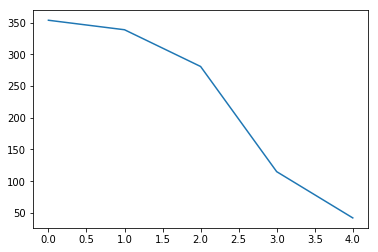

Percentage of gain: -0.3079554073846049
Total gain: -348.60552115937276
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 66  50]
 [108 130]]
0.5536723163841808
Percentile:  1
[[ 64  50]
 [116 112]]
0.5146198830409356
Percentile:  2
[[41 86]
 [83 68]]
0.3920863309352518
Percentile:  3
[[15 48]
 [17 34]]
0.4298245614035088
Percentile:  4
[[ 7 21]
 [12  2]]
0.21428571428571427
000000000000000000000000000000000000000000000000
Working on... CSCO
6.455652128779988
0.0
Diff in tren train and test
0.6754775655264327
0.576
F1,score 0.5811320754716981
G-score: 0.5066666666666667
Window: 140
[[185 292]
 [263 385]]
Vol pos 2.030723484026661
Vol neg 1.647393928424587


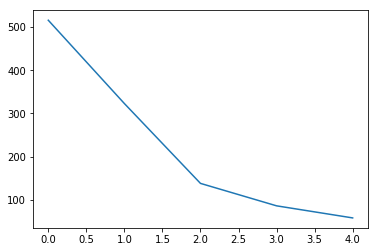

Percentage of gain: 0.21618556055071197
Total gain: 243.20875561955094
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 96 124]
 [139 157]]
0.4903100775193798
Percentile:  1
[[ 15  81]
 [ 91 136]]
0.4674922600619195
Percentile:  2
[[ 2 48]
 [31 57]]
0.427536231884058
Percentile:  3
[[29 29]
 [ 0 28]]
0.6627906976744186
Percentile:  4
[[42 10]
 [ 0  6]]
0.8275862068965517
000000000000000000000000000000000000000000000000
Working on... CMCSA
10.63829787234043
0.0
Diff in tren train and test
0.45605123674911663
0.5229681978798587
F1,score 0.48490393412625804
G-score: 0.5026501766784452
Window: 140
[[304 236]
 [327 265]]
Vol pos 2.960851602646625
Vol neg 2.7519317412272724


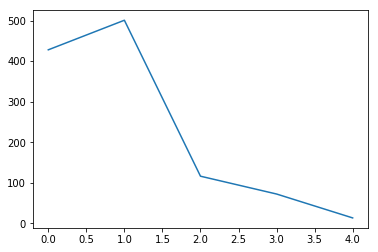

Percentage of gain: 0.11959981589662115
Total gain: 135.38699159497514
000000000000000000000000000000000000000000000000
Percentile:  0
[[105 122]
 [ 91 110]]
0.5023364485981309
Percentile:  1
[[123  74]
 [185 119]]
0.48303393213572854
Percentile:  2
[[21 21]
 [45 29]]
0.43103448275862066
Percentile:  3
[[42 18]
 [ 6  6]]
0.6666666666666666
Percentile:  4
[[12  1]
 [ 0  0]]
0.9230769230769231
000000000000000000000000000000000000000000000000
Working on... NVDA
14.360220994475142
0.0
Diff in tren train and test
0.6489291234268051
0.5795053003533569
F1,score 0.7386430678466076
G-score: 0.6086572438162544
Window: 140
[[ 63 413]
 [ 30 626]]
Vol pos 4.4164256919598435
Vol neg 2.7640022757261735


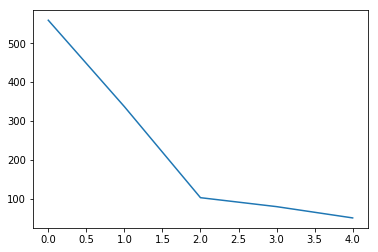

Percentage of gain: 1.6064172205067466
Total gain: 1818.4642936136372
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 36 277]
 [  8 238]]
0.49016100178890876
Percentile:  1
[[ 17 100]
 [  5 215]]
0.6884272997032641
Percentile:  2
[[ 8 23]
 [ 0 72]]
0.7766990291262136
Percentile:  3
[[ 2 13]
 [12 53]]
0.6875
Percentile:  4
[[ 0  0]
 [ 5 46]]
0.9019607843137255
000000000000000000000000000000000000000000000000
Working on... NFLX
14.669899702413757
0.00276273621394378
Diff in tren train and test
0.6528268551236749
0.7376325088339223
F1,score 0.5271439811172305
G-score: 0.46908127208480566
Window: 140
[[196 101]
 [500 335]]
Vol pos 3.8134359534462714
Vol neg 4.798953415117136


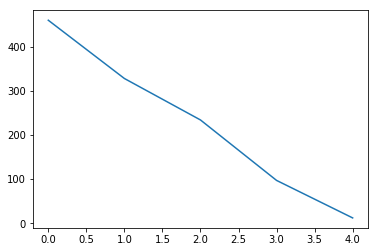

Percentage of gain: -0.7590428544217567
Total gain: -859.2365112054285
000000000000000000000000000000000000000000000000
Percentile:  0
[[124  46]
 [154 136]]
0.5652173913043478
Percentile:  1
[[ 34  26]
 [163 105]]
0.42378048780487804
Percentile:  2
[[ 15  23]
 [122  73]]
0.3776824034334764
Percentile:  3
[[21  6]
 [50 20]]
0.422680412371134
Percentile:  4
[[ 1  0]
 [10  1]]
0.16666666666666666
000000000000000000000000000000000000000000000000
Working on... BKNG
3.9693863684895057
0.013598169405054938
Diff in tren train and test
0.5771643663739021
0.6708542713567839
F1,score 0.5966587112171838
G-score: 0.5753768844221105
Window: 140
[[104  27]
 [142 125]]
Vol pos 1.1106371364496477
Vol neg 1.2763609307935346


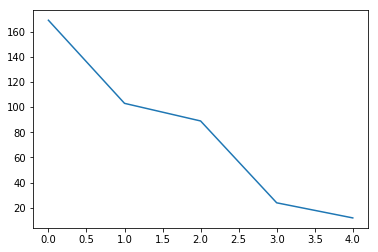

Percentage of gain: 0.09706258025844716
Total gain: 38.63090694286197
000000000000000000000000000000000000000000000000
Percentile:  0
[[72 25]
 [52 23]]
0.5523255813953488
Percentile:  1
[[24  2]
 [25 49]]
0.73
Percentile:  2
[[ 7  0]
 [42 40]]
0.5280898876404494
Percentile:  3
[[ 0  0]
 [11 12]]
0.5217391304347826
Percentile:  4
[[ 0  0]
 [11  1]]
0.08333333333333333
000000000000000000000000000000000000000000000000
Working on... ADBE
9.949148290880911
0.0
Diff in tren train and test
0.716024789729969
0.6563330380868024
F1,score 0.24180327868852455
G-score: 0.3445527015057573
Window: 140
[[271 117]
 [623 118]]
Vol pos 1.702683767649351
Vol neg 3.0768784542122076


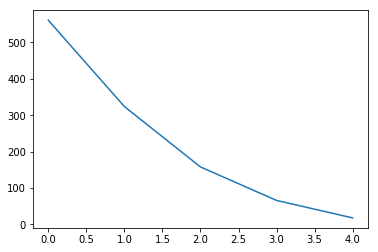

Percentage of gain: -1.4300673786549478
Total gain: -1614.5460705014361
000000000000000000000000000000000000000000000000
Percentile:  0
[[195  82]
 [198  86]]
0.5008912655971479
Percentile:  1
[[ 49  14]
 [230  31]]
0.24691358024691357
Percentile:  2
[[ 11  14]
 [132   1]]
0.0759493670886076
Percentile:  3
[[16  7]
 [43  0]]
0.24242424242424243
Percentile:  4
[[ 0  0]
 [18  0]]
0.0
000000000000000000000000000000000000000000000000
Working on... AMGN
6.235840507476206
0.0
Diff in tren train and test
0.5342526690391459
0.7150489759572574
F1,score 0.7216093445814407
G-score: 0.6179875333926982
Window: 140
[[138 182]
 [247 556]]
Vol pos 2.051923241839403
Vol neg 1.7360254679143714


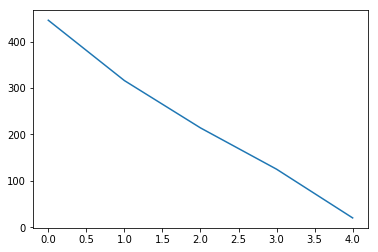

Percentage of gain: 0.6048796118444171
Total gain: 679.2798041012803
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 51 114]
 [108 173]]
0.5022421524663677
Percentile:  1
[[ 29  26]
 [ 56 205]]
0.740506329113924
Percentile:  2
[[ 18   8]
 [ 51 137]]
0.7242990654205608
Percentile:  3
[[25 31]
 [30 39]]
0.512
Percentile:  4
[[14  3]
 [ 2  1]]
0.75
000000000000000000000000000000000000000000000000
Working on... TXN
8.254787181267975
0.008754267705498472
Diff in tren train and test
0.6905918727915195
0.6746242263483643
F1,score 0.6635451505016722
G-score: 0.5552608311229
Window: 140
[[132 236]
 [267 496]]
Vol pos 2.6861752647133916
Vol neg 2.2582143871196734


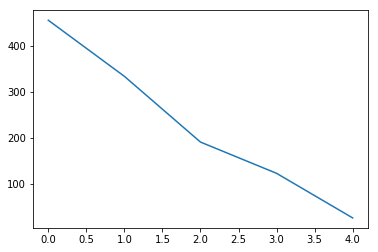

Percentage of gain: 0.4872115203526209
Total gain: 551.0362295188143
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 82 126]
 [ 85 162]]
0.5362637362637362
Percentile:  1
[[ 48  81]
 [ 95 110]]
0.47305389221556887
Percentile:  2
[[  0  14]
 [ 64 114]]
0.59375
Percentile:  3
[[ 1  9]
 [18 94]]
0.7786885245901639
Percentile:  4
[[ 1  6]
 [ 4 15]]
0.6153846153846154
000000000000000000000000000000000000000000000000
Working on... AVGO
10.183057294555825
0.0
Diff in tren train and test
0.5048802129547472
0.639751552795031
F1,score 0.23013048635824435
G-score: 0.4241348713398403
Window: 140
[[381  25]
 [624  97]]
Vol pos 2.8171750023173416
Vol neg 3.485305840579458


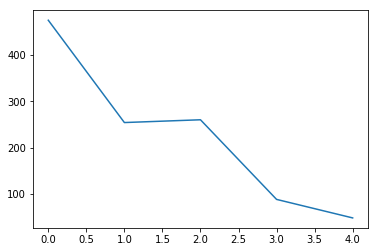

Percentage of gain: -0.8122039391556155
Total gain: -915.3538394283787
000000000000000000000000000000000000000000000000
Percentile:  0
[[199   2]
 [231  43]]
0.5094736842105263
Percentile:  1
[[101   3]
 [116  34]]
0.531496062992126
Percentile:  2
[[ 18  20]
 [202  20]]
0.14615384615384616
Percentile:  3
[[25  0]
 [63  0]]
0.2840909090909091
Percentile:  4
[[37  0]
 [11  0]]
0.7708333333333334
000000000000000000000000000000000000000000000000
Working on... PYPL
12.136266855926186
0.0
Diff in tren train and test
0.7039823008849557
0.7183348095659876
F1,score 0.49465648854961836
G-score: 0.4136403897254207
Window: 140
[[143 175]
 [487 324]]
Vol pos 2.309360103518862
Vol neg 3.333530971365265


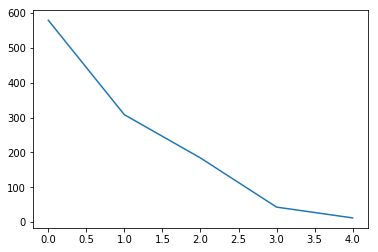

Percentage of gain: -0.9994033079720968
Total gain: -1128.3263347004972
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 70  64]
 [224 221]]
0.5025906735751295
Percentile:  1
[[ 34  17]
 [178  79]]
0.36688311688311687
Percentile:  2
[[30 90]
 [45 19]]
0.266304347826087
Percentile:  3
[[ 9  4]
 [28  2]]
0.2558139534883721
Percentile:  4
[[ 0  0]
 [11  1]]
0.08333333333333333
000000000000000000000000000000000000000000000000
Working on... GILD
12.867944909532813
0.0
Diff in tren train and test
0.4787422497785651
0.48404255319148937
F1,score 0.05964912280701754
G-score: 0.524822695035461
Window: 140
[[575   7]
 [529  17]]
Vol pos 3.711335906646979
Vol neg 2.717048948662224


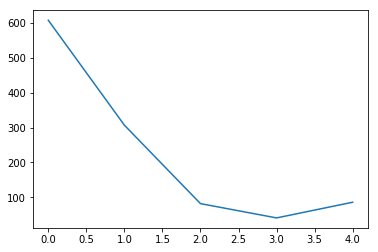

Percentage of gain: 0.656713315826294
Total gain: 740.7726202520596
000000000000000000000000000000000000000000000000
Percentile:  0
[[339   0]
 [268   1]]
0.5592105263157895
Percentile:  1
[[ 97   6]
 [188  16]]
0.36807817589576547
Percentile:  2
[[12  0]
 [70  0]]
0.14634146341463414
Percentile:  3
[[41]]
1.0
Percentile:  4
[[85  1]
 [ 0  0]]
0.9883720930232558
000000000000000000000000000000000000000000000000
Working on... COST
4.088465050218121
0.001175434642521966
Diff in tren train and test
0.6553559547571524
0.6583850931677019
F1,score 0.06956521739130435
G-score: 0.33540372670807456
Window: 140
[[350  35]
 [714  28]]
Vol pos 1.0011169150114037
Vol neg 1.5828351474517366


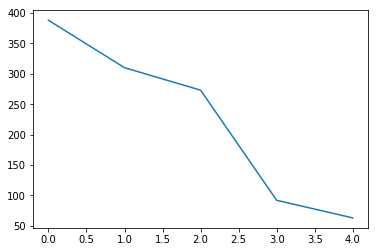

Percentage of gain: -0.716167996066584
Total gain: -807.1213315670402
000000000000000000000000000000000000000000000000
Percentile:  0
[[171  29]
 [175  12]]
0.4728682170542636
Percentile:  1
[[ 98   6]
 [197   9]]
0.34516129032258064
Percentile:  2
[[ 68   0]
 [199   6]]
0.27106227106227104
Percentile:  3
[[12  0]
 [79  1]]
0.14130434782608695
Percentile:  4
[[ 0  0]
 [63  0]]
0.0
000000000000000000000000000000000000000000000000
Working on... QCOM
11.725006748852696
0.0
Diff in tren train and test
0.47791519434628976
0.6861184792219275
F1,score 0.7946428571428571
G-score: 0.6746242263483643
Window: 140
[[ 51 304]
 [ 64 712]]
Vol pos 3.4194884470560725
Vol neg 3.211384892932882


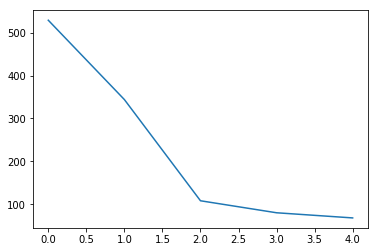

Percentage of gain: 1.2619629040711606
Total gain: 1427.2800445044827
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 30 200]
 [ 15 284]]
0.5935727788279773
Percentile:  1
[[  8  40]
 [ 38 258]]
0.7732558139534884
Percentile:  2
[[ 0 18]
 [ 3 87]]
0.8055555555555556
Percentile:  3
[[ 0 12]
 [ 6 62]]
0.775
Percentile:  4
[[12 34]
 [ 2 20]]
0.47058823529411764
000000000000000000000000000000000000000000000000
Mean gain over portfolio :  83.75909863937225


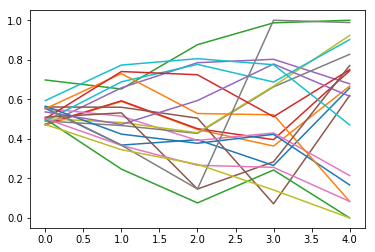

In [17]:
import warnings
warnings.filterwarnings('ignore')
o=0
accstocksresults=[]
f1stocksresults=[]
f1scoreresults=[]
aucresults=[]
chartlist=[]
gainlist=[]

for price in prices:
    #print('New price[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]')
    
   
    print('Working on...',files[o])
    
    senttemp=sentiment[o]
    senttemp=np.nan_to_num(np.asarray(senttemp, dtype=float))
    xtemp=price
    o+=1
    xtemp=np.nan_to_num(np.asarray(xtemp, dtype=float))
    xtemp=normalize(xtemp,axis=0,norm='max')
    #print(xtemp)
    accintime=[]
    trendwindowtime=[140]
    f1total=[]
    acctotal=[]
    auctotal=[]
    percfinal=[]
    f1scoretotal=[]
    percpostotal=[]
    percnegtotal=[]
    for t in trendwindowtime:
        #1
    #label because of the maket and append values without data
    #simo theroy past trend
        
        x=[]
        y=[]
        percentage=[]
        
        yvolatility=[]
        #print('============================================================')
        #print('Working on window:',t)
        #print(len(xtemp))
        ##QUI C E L'UNICO APPUNTO GUARDA SE CON +1 CAMBIA
        for i in range(0,len(price)-t-1):
            s=np.sign(price.iloc[i+t+1]['close']-price.iloc[i+1]['open'])
            percentage.append((100*(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open']) 
            if(s==-1):
                y.append(0)
            else:
                y.append(1)
            yvolatility.append((100*abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open'])
            
            x.append(senttemp[i])
        y=np.array(y)
        
        x=np.array(x)
        percentage=np.array(percentage)
        permindex=range(0,len(x))
        #permindex=np.random.permutation(permindex)
        train=0.8
        nt=math.ceil(len(x)*train)
        trainvalindex=permindex[0:nt]
        testindex=permindex[nt:]
        
        yvolatility=np.array(yvolatility)
        x_tv=[]
        y_tv=[]
        x_test=[]
        y_test=[]
        x_tv=x[trainvalindex]
        y_tv=y[trainvalindex]
        x_test=x[testindex]
        y_test=y[testindex]
        yvolatilitytest=yvolatility[testindex]
        #create structure for percentile valuation
        distribution=[]
        print(max(yvolatilitytest))
        print(min(yvolatilitytest))
        step=(max(yvolatilitytest)-min(yvolatilitytest))/5
        for v in range(0,5):
            pindexes=[]
            for r in range(0,len(y_test)):
                if(yvolatilitytest[r]<min(yvolatilitytest)+step+step*v and yvolatilitytest[r]>min(yvolatilitytest)+step*v):
                    pindexes.append(r)
            distribution.append(pindexes)
    

        cspace=np.logspace(-4,4,10)
        gspace=np.logspace(-4,4,10)
        bestsvm=None
        maxacc=0
        cvacc=0
        maxg=0
        maxc=0
        #print('Model Selection...')
        #model selection
        cvacc=0
        totu=0
        for c in cspace:
            #print()
            for g in gspace:
                
                cvacclist=[]
                #faccio cross validation
                #start with 40% as train and 10% for validation and then i move in percentege
                # 0-40 40-50
                # 0-50 50-60
                # 0-60 60-70 
                #etc test set is completely external i do in some way error extimation changin the ticker
                trainpoint=math.floor(len(x_tv)*0.40)
                dimval=math.floor(trainpoint*0.25)
                endval=trainpoint+dimval
                
                for i in range(0,6):
                    #print('-----')
                    x_train=x_tv[0:trainpoint]
                    y_train=y_tv[0:trainpoint]
                    x_val=x_tv[trainpoint:endval]
                    y_val=y_tv[trainpoint:endval]
                    #print(trainpoint)
                    #print(endval)
                    #print(len(x_tv))
                    trainpoint=trainpoint+dimval
                    endval=endval+dimval
                    p=sum(y_train)/(len(y_train)-sum(y_train))
                    rbf_svm=svm.SVC(kernel='rbf',C=c,gamma=g)
                    x_train,y_train=smote(x_train,y_train)
                    rbf_svm.fit(x_train,y_train)
                    
                    
                    if(sum(y_val)+6<len(x_val) and sum(y_val)>6):
                        x_val,y_val=smote(x_val,y_val)
                    else:
                        totu=totu+1
                    prediction=rbf_svm.predict(x_val)
                    
                    cvacclist.append(rbf_svm.score(x_val,y_val))
                    
                cvacc=sum(cvacclist)/len(cvacclist)
                if(cvacc>maxacc):
                    #print(cvacc)
                    maxacc=cvacc
                    maxg=g
                    maxc=c
                    bestsvm=rbf_svm

        
        print('Diff in tren train and test')
        print(sum(y_tv)/len(y_tv))
        print(sum(y_test)/len(y_test))
        p=sum(y_tv)/(len(y_tv)-sum(y_tv))
        rbf_svm=svm.SVC(kernel='rbf',C=maxc, gamma=maxg )
        x_tv,y_tv=smote(x_tv,y_tv)
        rbf_svm.fit(x_tv,y_tv)
        prediction=rbf_svm.predict(x_test)
        volr=[]
        voln=[]
        for j in range(0,len(x_test)):
            if(y_test[j]==prediction[j]):
                volr.append(yvolatilitytest[j])
            else:
                voln.append(yvolatilitytest[j])
        confmatrix=confusion_matrix(y_test, prediction)
        CM = f1_score(y_test, prediction)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
        auc=metrics.auc(fpr, tpr)
        valueacc=rbf_svm.score(x_test,y_test)
        
        print('F1,score',CM)
        print('G-score:',valueacc)
        print('Window:',t)
        print(confmatrix)
        print('Vol pos',sum(volr)/len(volr))
        print('Vol neg',sum(voln)/len(voln))
        percnegtotal.append(sum(volr)/len(volr))
        percpostotal.append(sum(voln)/len(voln))
        #build structure to plot distribution onver percentile
        chart=np.zeros(5)
        for r in range(0,len(y_test)):
            for v in range(0,5):
                if(yvolatilitytest[r]<min(yvolatility)+step+step*v and yvolatilitytest[r]>min(yvolatility)+step*v):
                    chart[v]+=1
        plt.plot(chart)
        plt.show()
        
        print('Percentage of gain:',(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('Total gain:',len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        gainlist.append(len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('000000000000000000000000000000000000000000000000')
        #performances for each percentile
        chartscore=[]
        for g in range(0,len(distribution)):
            print('Percentile: ',g)
            tempscore=0
            if(len(distribution[g])>0):
                predictionp=rbf_svm.predict(x_test[distribution[g]])
                print(confusion_matrix(y_test[distribution[g]], predictionp))
                print(rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]]))
                tempscore=rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]])
            chartscore.append(tempscore)    
        chartlist.append(chartscore)
        print('000000000000000000000000000000000000000000000000')
print('Mean gain over portfolio : ', sum(gainlist)/len(gainlist))
#print all the accuracy varing the percentile
for st in range(0,len(chartlist)):
    plt.plot(chartlist[st])
plt.show()
        
        
        

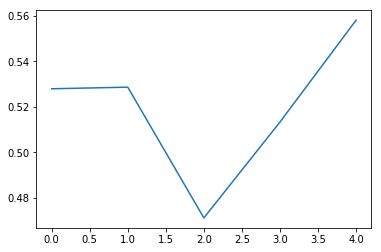

In [18]:
tot=np.zeros(5)
for st in range(0,len(chartlist)):
    tot=chartlist[st]+tot
    
tot=tot/20
plt.plot(tot)
plt.show()

Working on... AAPL
15.270476249727803
0.0052039966694373985
Diff in tren train and test
0.5556300268096515
0.6091234347048301
F1,score 0.66973079448457
G-score: 0.5500894454382826
Window: 200
[[105 332]
 [171 510]]
Vol pos 4.651087608155676
Vol neg 3.6707974229635707


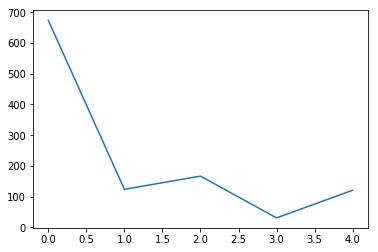

Percentage of gain: 0.906983698805961
Total gain: 1014.0077752650643
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 56 223]
 [ 89 305]]
0.5364041604754829
Percentile:  1
[[27 42]
 [15 40]]
0.5403225806451613
Percentile:  2
[[14 67]
 [37 49]]
0.3772455089820359
Percentile:  3
[[ 8  0]
 [ 5 18]]
0.8387096774193549
Percentile:  4
[[ 0  0]
 [25 96]]
0.7933884297520661
000000000000000000000000000000000000000000000000
Working on... AMZN
11.321930760535398
0.0025179720253285087
Diff in tren train and test
0.7125
0.8303571428571429
F1,score 0.6610824742268041
G-score: 0.5303571428571429
Window: 200
[[ 81 109]
 [417 513]]
Vol pos 2.931963579761009
Vol neg 2.820617201203989


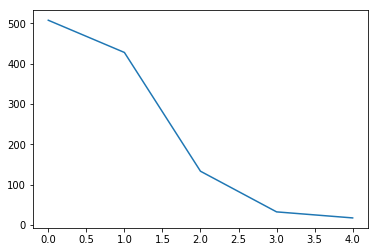

Percentage of gain: 0.23030510584351893
Total gain: 257.9417185447412
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 80 108]
 [142 178]]
0.5078740157480315
Percentile:  1
[[  1   1]
 [188 238]]
0.5584112149532711
Percentile:  2
[[ 0  0]
 [65 68]]
0.5112781954887218
Percentile:  3
[[ 0  0]
 [17 15]]
0.46875
Percentile:  4
[[ 0  0]
 [ 5 12]]
0.7058823529411765
000000000000000000000000000000000000000000000000
Working on... PEP
7.1599283011352295
0.0
Diff in tren train and test
0.31000781860828774
0.9765258215962441
F1,score 0.9767814251401119
G-score: 0.9546165884194053
Window: 200
[[  0  15]
 [ 14 610]]
Vol pos 2.7879675155863635
Vol neg 1.1441663822804338


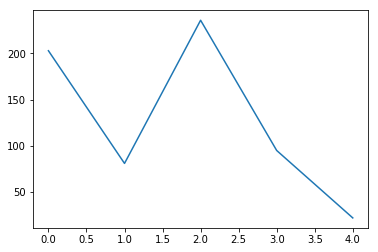

Percentage of gain: 2.6095138645094664
Total gain: 1667.4793594215494
000000000000000000000000000000000000000000000000
Percentile:  0
[[  0  15]
 [  7 181]]
0.8916256157635468
Percentile:  1
[[81]]
1.0
Percentile:  2
[[  0   0]
 [  7 229]]
0.9703389830508474
Percentile:  3
[[95]]
1.0
Percentile:  4
[[22]]
1.0
000000000000000000000000000000000000000000000000
Working on... GOOGL
9.972699216586207
0.0019559137050855525
Diff in tren train and test
0.6362823949955317
0.6574239713774598
F1,score 0.7933081489476524
G-score: 0.6574239713774598
Window: 200
[[  0 383]
 [  0 735]]
Vol pos 3.8860814952175016
Vol neg 2.572427671342264


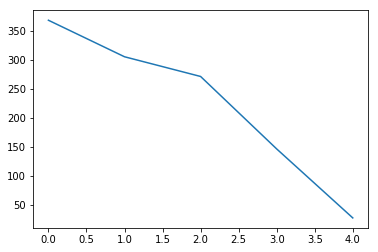

Percentage of gain: 1.673551074115185
Total gain: 1871.0301008607767
000000000000000000000000000000000000000000000000
Percentile:  0
[[  0 181]
 [  0 186]]
0.5068119891008175
Percentile:  1
[[  0 100]
 [  0 205]]
0.6721311475409836
Percentile:  2
[[  0  92]
 [  0 179]]
0.6605166051660517
Percentile:  3
[[  0  10]
 [  0 136]]
0.9315068493150684
Percentile:  4
[[27]]
1.0
000000000000000000000000000000000000000000000000
Working on... MSFT
5.8924023311029625
0.0
Diff in tren train and test
0.6748603351955307
0.6851520572450805
F1,score 0.19148936170212766
G-score: 0.32021466905187834
Window: 200
[[268  84]
 [676  90]]
Vol pos 1.3103791414528108
Vol neg 2.0510655786518233


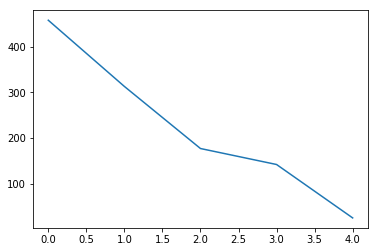

Percentage of gain: -0.974681670067334
Total gain: -1089.6941071352794
000000000000000000000000000000000000000000000000
Percentile:  0
[[170  34]
 [222  32]]
0.4410480349344978
Percentile:  1
[[ 80  44]
 [170  19]]
0.31629392971246006
Percentile:  2
[[ 18   5]
 [136  18]]
0.2033898305084746
Percentile:  3
[[  0   1]
 [125  16]]
0.11267605633802817
Percentile:  4
[[ 0  0]
 [20  5]]
0.2
000000000000000000000000000000000000000000000000
Working on... FB
12.336073288573756
0.010328444536258126
Diff in tren train and test
0.5438518187904485
0.8696428571428572
F1,score 0.7391812865497075
G-score: 0.6017857142857143
Window: 200
[[ 42 104]
 [342 632]]
Vol pos 3.6773272811810513
Vol neg 3.344804138582442


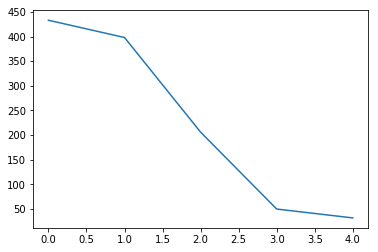

Percentage of gain: 0.881014233668089
Total gain: 986.7359417082596
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 33  76]
 [117 208]]
0.5552995391705069
Percentile:  1
[[  9  27]
 [116 245]]
0.6397984886649875
Percentile:  2
[[  0   1]
 [ 76 129]]
0.6262135922330098
Percentile:  3
[[ 0  0]
 [17 32]]
0.6530612244897959
Percentile:  4
[[ 0  0]
 [16 16]]
0.5
000000000000000000000000000000000000000000000000
Working on... INTC
7.207444473707307
0.0
Diff in tren train and test
0.6317786208435617
0.5767857142857142
F1,score 0.4335793357933579
G-score: 0.4517857142857143
Window: 200
[[271 203]
 [411 235]]
Vol pos 2.6084401476307435
Vol neg 2.297083941604352


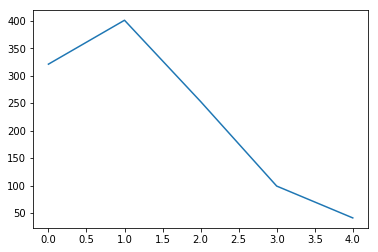

Percentage of gain: -0.08083823700349646
Total gain: -90.53882544391604
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 87  83]
 [104  47]]
0.4174454828660436
Percentile:  1
[[103  68]
 [161  69]]
0.428927680798005
Percentile:  2
[[ 48  37]
 [105  63]]
0.43873517786561267
Percentile:  3
[[17  5]
 [32 45]]
0.6262626262626263
Percentile:  4
[[15 10]
 [ 8  8]]
0.5609756097560976
000000000000000000000000000000000000000000000000
Working on... CSCO
6.408313487767918
0.011134617525877858
Diff in tren train and test
0.7121688370004491
0.5992812219227314
F1,score 0.5667655786350149
G-score: 0.4752920035938904
Window: 200
[[147 299]
 [285 382]]
Vol pos 2.160567662975058
Vol neg 2.2055472510324754


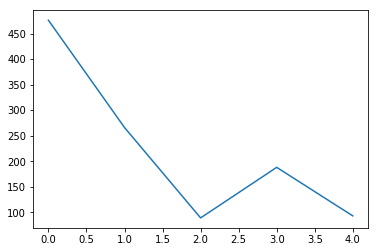

Percentage of gain: -0.13036774563266854
Total gain: -145.09930088916008
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 80 123]
 [150 126]]
0.430062630480167
Percentile:  1
[[ 22  17]
 [ 90 133]]
0.5916030534351145
Percentile:  2
[[ 3 10]
 [25 54]]
0.6195652173913043
Percentile:  3
[[23 91]
 [17 57]]
0.425531914893617
Percentile:  4
[[18 58]
 [ 2 12]]
0.3333333333333333
000000000000000000000000000000000000000000000000
Working on... CMCSA
10.116774878445044
0.0
Diff in tren train and test
0.44776785714285716
0.5348214285714286
F1,score 0.20974889217134413
G-score: 0.5223214285714286
Window: 200
[[514   7]
 [528  71]]
Vol pos 3.788318708041985
Vol neg 2.9192423745664775


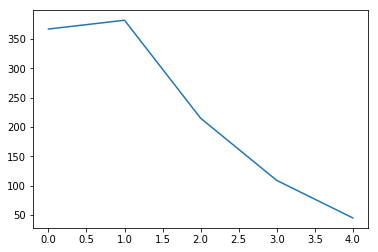

Percentage of gain: 0.5842605123316927
Total gain: 654.3717738114958
000000000000000000000000000000000000000000000000
Percentile:  0
[[131   7]
 [205  24]]
0.4223433242506812
Percentile:  1
[[163   0]
 [200  19]]
0.47643979057591623
Percentile:  2
[[135   0]
 [ 70  10]]
0.6744186046511628
Percentile:  3
[[66  0]
 [34  9]]
0.6880733944954128
Percentile:  4
[[19  0]
 [17  9]]
0.6222222222222222
000000000000000000000000000000000000000000000000
Working on... NVDA
16.150883867675034
0.0019193489568320964
Diff in tren train and test
0.6511939299263557
0.6419642857142858
F1,score 0.6022253129346314
G-score: 0.48928571428571427
Window: 200
[[115 286]
 [286 433]]
Vol pos 4.701924630589581
Vol neg 4.651342289144541


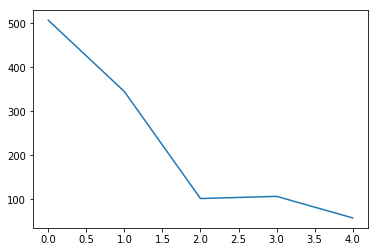

Percentage of gain: -0.07492240341748786
Total gain: -83.91309182758641
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 62 151]
 [115 178]]
0.4743083003952569
Percentile:  1
[[ 49 120]
 [ 58 118]]
0.48405797101449277
Percentile:  2
[[ 4 15]
 [29 54]]
0.5686274509803921
Percentile:  3
[[ 0  0]
 [50 57]]
0.5327102803738317
Percentile:  4
[[ 0  0]
 [34 24]]
0.41379310344827586
000000000000000000000000000000000000000000000000
Working on... NFLX
16.219868718627612
0.0
Diff in tren train and test
0.6252232142857143
0.7955357142857142
F1,score 0.6635822868473232
G-score: 0.5455357142857142
Window: 200
[[109 120]
 [389 502]]
Vol pos 5.406606936820342
Vol neg 5.275252878003019


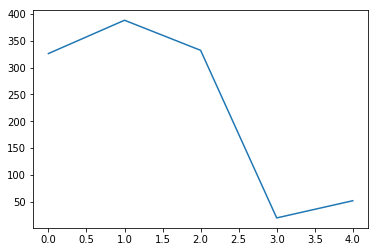

Percentage of gain: 0.5520831459765113
Total gain: 618.3331234936927
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 45  43]
 [104 134]]
0.549079754601227
Percentile:  1
[[ 46  53]
 [123 166]]
0.5463917525773195
Percentile:  2
[[ 18  24]
 [129 161]]
0.5391566265060241
Percentile:  3
[[ 0  0]
 [10 10]]
0.5
Percentile:  4
[[ 0  0]
 [22 30]]
0.5769230769230769
000000000000000000000000000000000000000000000000
Working on... BKNG
4.336126439130737
0.0018669255470074874
Diff in tren train and test
0.5258732212160414
0.7046632124352331
F1,score 0.8276923076923077
G-score: 0.7098445595854922
Window: 200
[[  5 109]
 [  3 269]]
Vol pos 1.8731826492515204
Vol neg 0.5093211932728359


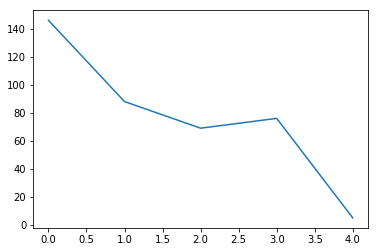

Percentage of gain: 1.1818861975346087
Total gain: 456.208072248359
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 5 95]
 [ 3 43]]
0.3287671232876712
Percentile:  1
[[ 0 12]
 [ 0 76]]
0.8636363636363636
Percentile:  2
[[ 0  1]
 [ 0 68]]
0.9855072463768116
Percentile:  3
[[76]]
1.0
Percentile:  4
[[5]]
1.0
000000000000000000000000000000000000000000000000
Working on... ADBE
9.848536613142013
0.002086767805344401
Diff in tren train and test
0.7138702460850112
0.7242614145031334
F1,score 0.6075268817204301
G-score: 0.477170993733214
Window: 200
[[ 81 227]
 [357 452]]
Vol pos 3.5146424939529157
Vol neg 2.9008800705313385


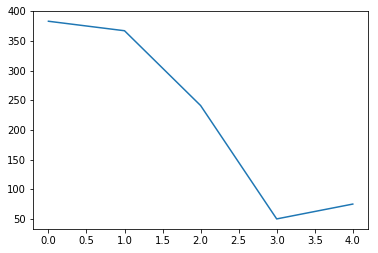

Percentage of gain: 0.16042120688147024
Total gain: 179.19048808660227
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 70  70]
 [100 143]]
0.556135770234987
Percentile:  1
[[  3 121]
 [141 102]]
0.28610354223433243
Percentile:  2
[[  7  36]
 [ 95 102]]
0.45416666666666666
Percentile:  3
[[ 0  0]
 [ 6 44]]
0.88
Percentile:  4
[[ 0  0]
 [15 60]]
0.8
000000000000000000000000000000000000000000000000
Working on... AMGN
5.841163444850075
0.007105975040131699
Diff in tren train and test
0.5184352517985612
0.7821782178217822
F1,score 0.693280106453759
G-score: 0.585058505850585
Window: 200
[[129 113]
 [348 521]]
Vol pos 2.6377896789581783
Vol neg 2.0213019487974395


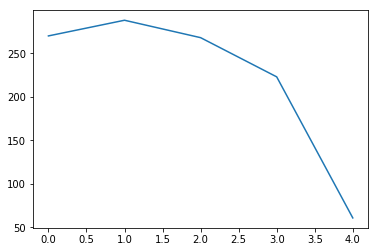

Percentage of gain: 0.7045392375582326
Total gain: 782.7430929271964
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 33  20]
 [152  68]]
0.36996336996337
Percentile:  1
[[ 26  17]
 [ 83 162]]
0.6527777777777778
Percentile:  2
[[ 31  32]
 [ 66 137]]
0.631578947368421
Percentile:  3
[[ 32  36]
 [ 44 109]]
0.6380090497737556
Percentile:  4
[[ 7  8]
 [ 2 44]]
0.8360655737704918
000000000000000000000000000000000000000000000000
Working on... TXN
9.594205774382367
0.0
Diff in tren train and test
0.6787946428571429
0.7211796246648794
F1,score 0.7681874229346485
G-score: 0.6639857015192135
Window: 200
[[120 192]
 [184 623]]
Vol pos 3.0264612292696094
Vol neg 3.296118438795595


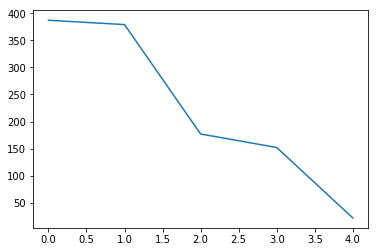

Percentage of gain: 0.9019840575157965
Total gain: 1009.3201603601763
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 44 110]
 [ 11 222]]
0.6873385012919897
Percentile:  1
[[ 76  67]
 [ 62 174]]
0.6596306068601583
Percentile:  2
[[  0  15]
 [ 29 133]]
0.751412429378531
Percentile:  3
[[ 0  0]
 [73 79]]
0.5197368421052632
Percentile:  4
[[ 0  0]
 [ 9 13]]
0.5909090909090909
000000000000000000000000000000000000000000000000
Working on... AVGO
9.981040657257227
0.0025934464021118834
Diff in tren train and test
0.4697309417040359
0.6932735426008969
F1,score 0.12811387900355872
G-score: 0.34080717488789236
Window: 200
[[326  16]
 [719  54]]
Vol pos 4.544722019279232
Vol neg 3.872430565260394


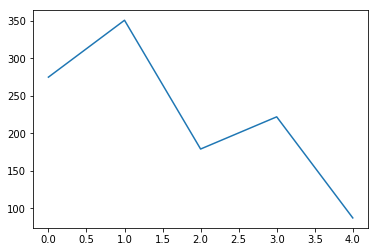

Percentage of gain: -1.0038045723231224
Total gain: -1119.2420981402815
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 91   0]
 [182   1]]
0.3357664233576642
Percentile:  1
[[100   0]
 [251   1]]
0.2869318181818182
Percentile:  2
[[ 29  12]
 [132   5]]
0.19101123595505617
Percentile:  3
[[ 70   4]
 [112  36]]
0.4774774774774775
Percentile:  4
[[36  0]
 [40 11]]
0.5402298850574713
000000000000000000000000000000000000000000000000
Working on... PYPL
11.940298507462696
0.005534927156825336
Diff in tren train and test
0.7345706618962433
0.7493285586392122
F1,score 0.8225806451612904
G-score: 0.7045658012533572
Window: 200
[[ 22 258]
 [ 72 765]]
Vol pos 3.4899984939163495
Vol neg 4.46555410605438


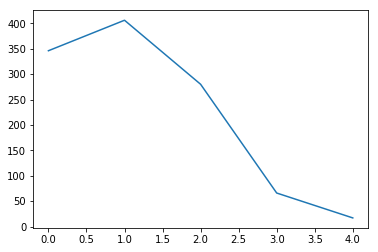

Percentage of gain: 1.1396561859572263
Total gain: 1272.9959597142217
000000000000000000000000000000000000000000000000
Percentile:  0
[[  0  71]
 [  6 271]]
0.7787356321839081
Percentile:  1
[[  1  80]
 [ 35 288]]
0.7153465346534653
Percentile:  2
[[ 20  55]
 [ 20 184]]
0.7311827956989247
Percentile:  3
[[ 1 48]
 [ 4 13]]
0.21212121212121213
Percentile:  4
[[0 4]
 [6 8]]
0.4444444444444444
000000000000000000000000000000000000000000000000
Working on... GILD
12.784895482130821
0.0
Diff in tren train and test
0.477170993733214
0.48566308243727596
F1,score 0.6537997587454765
G-score: 0.48566308243727596
Window: 200
[[  0 574]
 [  0 542]]
Vol pos 3.4411122919025656
Vol neg 4.872699714821148


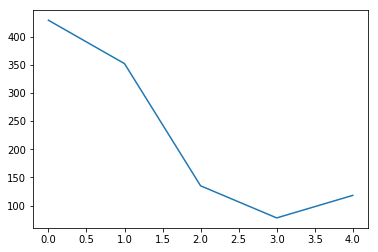

Percentage of gain: -0.8349881488316743
Total gain: -931.8467740961485
000000000000000000000000000000000000000000000000
Percentile:  0
[[  0 252]
 [  0 177]]
0.4125874125874126
Percentile:  1
[[  0 122]
 [  0 230]]
0.6534090909090909
Percentile:  2
[[  0   3]
 [  0 132]]
0.9777777777777777
Percentile:  3
[[ 0 78]
 [ 0  0]]
0.0
Percentile:  4
[[  0 118]
 [  0   0]]
0.0
000000000000000000000000000000000000000000000000
Working on... COST
5.257825954817153
0.0
Diff in tren train and test
0.675857431069267
0.7031390134529149
F1,score 0.6285714285714286
G-score: 0.49865470852017935
Window: 200
[[ 83 248]
 [311 473]]
Vol pos 1.6545085355568965
Vol neg 1.5472735535696096


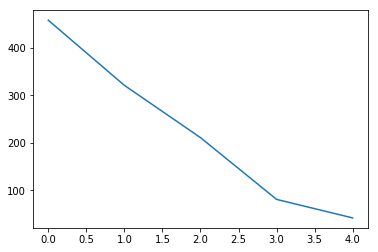

Percentage of gain: 0.049310160828899254
Total gain: 54.98082932422267
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 60 178]
 [ 60 160]]
0.48034934497816595
Percentile:  1
[[ 23  65]
 [ 97 136]]
0.4953271028037383
Percentile:  2
[[  0   5]
 [ 98 108]]
0.5118483412322274
Percentile:  3
[[ 0  0]
 [38 43]]
0.5308641975308642
Percentile:  4
[[ 0  0]
 [16 26]]
0.6190476190476191
000000000000000000000000000000000000000000000000
Working on... QCOM
15.039417828987261
0.008409014463509178
Diff in tren train and test
0.4767857142857143
0.7256478999106345
F1,score 0.0
G-score: 0.2743521000893655
Window: 200
[[307   0]
 [812   0]]
Vol pos 4.849276231347535
Vol neg 4.466883307555923


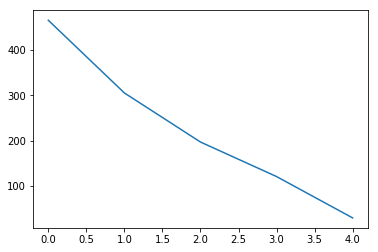

Percentage of gain: -1.910975373290184
Total gain: -2138.381442711716
000000000000000000000000000000000000000000000000
Percentile:  0
[[129   0]
 [338   0]]
0.2762312633832976
Percentile:  1
[[ 71   0]
 [231   0]]
0.23509933774834438
Percentile:  2
[[ 46   0]
 [151   0]]
0.233502538071066
Percentile:  3
[[59  0]
 [62  0]]
0.48760330578512395
Percentile:  4
[[ 2  0]
 [28  0]]
0.06666666666666667
000000000000000000000000000000000000000000000000
Mean gain over portfolio :  261.3311377761135


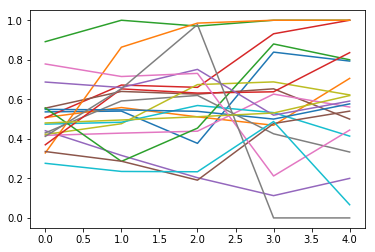

In [19]:
import warnings
warnings.filterwarnings('ignore')
o=0
accstocksresults=[]
f1stocksresults=[]
f1scoreresults=[]
aucresults=[]
chartlist=[]
gainlist=[]

for price in prices:
    #print('New price[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]')
    
   
    print('Working on...',files[o])
    
    senttemp=sentiment[o]
    senttemp=np.nan_to_num(np.asarray(senttemp, dtype=float))
    xtemp=price
    o+=1
    xtemp=np.nan_to_num(np.asarray(xtemp, dtype=float))
    xtemp=normalize(xtemp,axis=0,norm='max')
    #print(xtemp)
    accintime=[]
    trendwindowtime=[200]
    f1total=[]
    acctotal=[]
    auctotal=[]
    percfinal=[]
    f1scoretotal=[]
    percpostotal=[]
    percnegtotal=[]
    for t in trendwindowtime:
        #1
    #label because of the maket and append values without data
    #simo theroy past trend
        
        x=[]
        y=[]
        percentage=[]
        
        yvolatility=[]
        #print('============================================================')
        #print('Working on window:',t)
        #print(len(xtemp))
        ##QUI C E L'UNICO APPUNTO GUARDA SE CON +1 CAMBIA
        for i in range(0,len(price)-t-1):
            s=np.sign(price.iloc[i+t+1]['close']-price.iloc[i+1]['open'])
            percentage.append((100*(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open']) 
            if(s==-1):
                y.append(0)
            else:
                y.append(1)
            yvolatility.append((100*abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open'])
            
            x.append(senttemp[i])
        y=np.array(y)
        
        x=np.array(x)
        percentage=np.array(percentage)
        permindex=range(0,len(x))
        #permindex=np.random.permutation(permindex)
        train=0.8
        nt=math.ceil(len(x)*train)
        trainvalindex=permindex[0:nt]
        testindex=permindex[nt:]
        
        yvolatility=np.array(yvolatility)
        x_tv=[]
        y_tv=[]
        x_test=[]
        y_test=[]
        x_tv=x[trainvalindex]
        y_tv=y[trainvalindex]
        x_test=x[testindex]
        y_test=y[testindex]
        yvolatilitytest=yvolatility[testindex]
        #create structure for percentile valuation
        distribution=[]
        print(max(yvolatilitytest))
        print(min(yvolatilitytest))
        step=(max(yvolatilitytest)-min(yvolatilitytest))/5
        for v in range(0,5):
            pindexes=[]
            for r in range(0,len(y_test)):
                if(yvolatilitytest[r]<min(yvolatilitytest)+step+step*v and yvolatilitytest[r]>min(yvolatilitytest)+step*v):
                    pindexes.append(r)
            distribution.append(pindexes)
    

        cspace=np.logspace(-4,4,10)
        gspace=np.logspace(-4,4,10)
        bestsvm=None
        maxacc=0
        cvacc=0
        maxg=0
        maxc=0
        #print('Model Selection...')
        #model selection
        cvacc=0
        totu=0
        for c in cspace:
            #print()
            for g in gspace:
                
                cvacclist=[]
                #faccio cross validation
                #start with 40% as train and 10% for validation and then i move in percentege
                # 0-40 40-50
                # 0-50 50-60
                # 0-60 60-70 
                #etc test set is completely external i do in some way error extimation changin the ticker
                trainpoint=math.floor(len(x_tv)*0.40)
                dimval=math.floor(trainpoint*0.25)
                endval=trainpoint+dimval
                
                for i in range(0,6):
                    #print('-----')
                    x_train=x_tv[0:trainpoint]
                    y_train=y_tv[0:trainpoint]
                    x_val=x_tv[trainpoint:endval]
                    y_val=y_tv[trainpoint:endval]
                    #print(trainpoint)
                    #print(endval)
                    #print(len(x_tv))
                    trainpoint=trainpoint+dimval
                    endval=endval+dimval
                    p=sum(y_train)/(len(y_train)-sum(y_train))
                    rbf_svm=svm.SVC(kernel='rbf',C=c,gamma=g)
                    x_train,y_train=smote(x_train,y_train)
                    rbf_svm.fit(x_train,y_train)
                    
                    
                    if(sum(y_val)+6<len(x_val) and sum(y_val)>6):
                        x_val,y_val=smote(x_val,y_val)
                    else:
                        totu=totu+1
                    prediction=rbf_svm.predict(x_val)
                    
                    cvacclist.append(rbf_svm.score(x_val,y_val))
                    
                cvacc=sum(cvacclist)/len(cvacclist)
                if(cvacc>maxacc):
                    #print(cvacc)
                    maxacc=cvacc
                    maxg=g
                    maxc=c
                    bestsvm=rbf_svm

        
        print('Diff in tren train and test')
        print(sum(y_tv)/len(y_tv))
        print(sum(y_test)/len(y_test))
        p=sum(y_tv)/(len(y_tv)-sum(y_tv))
        rbf_svm=svm.SVC(kernel='rbf',C=maxc, gamma=maxg )
        x_tv,y_tv=smote(x_tv,y_tv)
        rbf_svm.fit(x_tv,y_tv)
        prediction=rbf_svm.predict(x_test)
        volr=[]
        voln=[]
        for j in range(0,len(x_test)):
            if(y_test[j]==prediction[j]):
                volr.append(yvolatilitytest[j])
            else:
                voln.append(yvolatilitytest[j])
        confmatrix=confusion_matrix(y_test, prediction)
        CM = f1_score(y_test, prediction)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
        auc=metrics.auc(fpr, tpr)
        valueacc=rbf_svm.score(x_test,y_test)
        
        print('F1,score',CM)
        print('G-score:',valueacc)
        print('Window:',t)
        print(confmatrix)
        print('Vol pos',sum(volr)/len(volr))
        print('Vol neg',sum(voln)/len(voln))
        percnegtotal.append(sum(volr)/len(volr))
        percpostotal.append(sum(voln)/len(voln))
        #build structure to plot distribution onver percentile
        chart=np.zeros(5)
        for r in range(0,len(y_test)):
            for v in range(0,5):
                if(yvolatilitytest[r]<min(yvolatility)+step+step*v and yvolatilitytest[r]>min(yvolatility)+step*v):
                    chart[v]+=1
        plt.plot(chart)
        plt.show()
        
        print('Percentage of gain:',(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('Total gain:',len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        gainlist.append(len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('000000000000000000000000000000000000000000000000')
        #performances for each percentile
        chartscore=[]
        for g in range(0,len(distribution)):
            print('Percentile: ',g)
            tempscore=0
            if(len(distribution[g])>0):
                predictionp=rbf_svm.predict(x_test[distribution[g]])
                print(confusion_matrix(y_test[distribution[g]], predictionp))
                print(rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]]))
                tempscore=rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]])
            chartscore.append(tempscore)    
        chartlist.append(chartscore)
        print('000000000000000000000000000000000000000000000000')
print('Mean gain over portfolio : ', sum(gainlist)/len(gainlist))
#print all the accuracy varing the percentile
for st in range(0,len(chartlist)):
    plt.plot(chartlist[st])
plt.show()
        
        
        

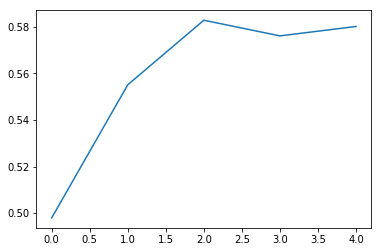

In [20]:
tot=np.zeros(5)
for st in range(0,len(chartlist)):
    tot=chartlist[st]+tot
    
tot=tot/20
plt.plot(tot)
plt.show()